In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
b_points = np.array([1, 5/4, 4/3, 6/4, 5/3, 7/4, 2, 7/3]) + 0.01

In [3]:
def c_density(size, percentage=21, seed=1, burnin=1000, evol=100):
    random.seed(seed)
    instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

    density = np.zeros((len(b_points),evol))
    
    for i in range(len(b_points)):
        game = GameField(size, b_points[i])
        game.field = np.copy(instance)
        game.evolve(burnin)
        for step in range(evol):
            game.evolve(1)
            density[i][step] = np.count_nonzero(1 - game.field) / size**2
    return density

In [4]:
#dencityПроцентПоле
density2115 = c_density(size=15, percentage=21, burnin=5000)
print('density2115')
density2133 = c_density(size=33, percentage=21, burnin=5000)
print('density2133')
density2172 = c_density(size=72, percentage=21, burnin=5000)
print('density2172')

density5015 = c_density(size=15, percentage=50, burnin=5000)
print('density5015')
density5033 = c_density(size=33, percentage=50, burnin=5000)
print('density5033')
density5072 = c_density(size=72, percentage=50, burnin=5000)
print('density5072')

density7015 = c_density(size=15, percentage=70, burnin=5000)
print('density7015')
density7033 = c_density(size=33, percentage=70, burnin=5000)
print('density7033')
density7072 = c_density(size=72, percentage=70, burnin=5000)
print('density7072')

density2115
density2133
density2172
density5015
density5033
density5072
density7015
density7033
density7072


# анализ Фурье

In [5]:
def fourier(density):
    four=np.fft.rfft(density)
    freq=np.fft.rfftfreq(density.size)
    mask=np.abs(four)>1e-14
    freq=freq[mask]
    four=four[mask]
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(21,10))
    
    ax1.plot(density, '.')
    ax1.set_xlabel('Время, c')
    ax1.set_ylabel('Плотность')
    ax1.grid(True)
    
    ax2.plot(freq,np.abs(four),'.')
    ax2.set_xlabel('Частота, Гц')
    ax2.set_ylabel('Амплитуда')
    ax2.grid(True)
    
    plt.show()
    print(np.abs(four))

## Сравнение начальных плотностей для одного поля (33x33)

### b=1

21 процент


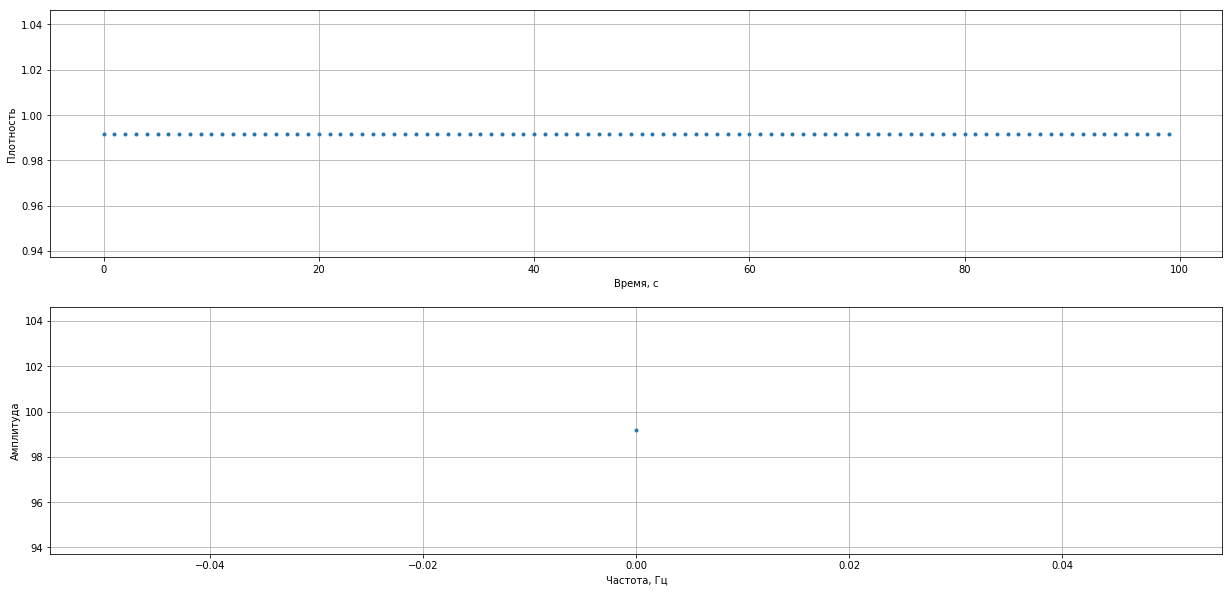

[99.17355372]
*************
50 процентов


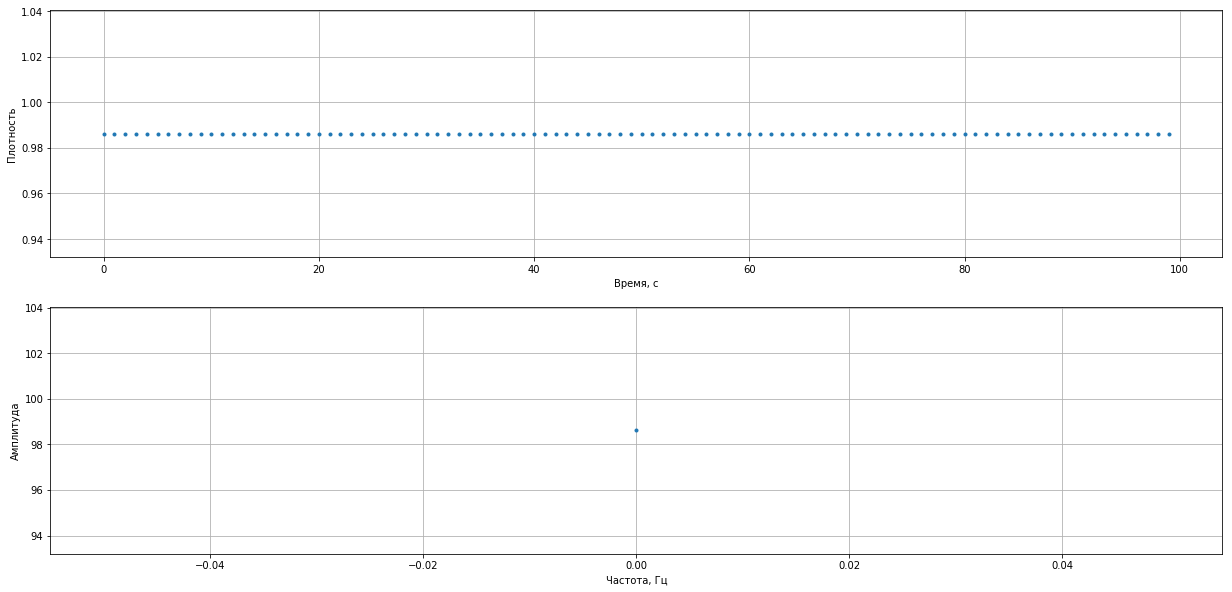

[98.62258953]
*************
70 процентов


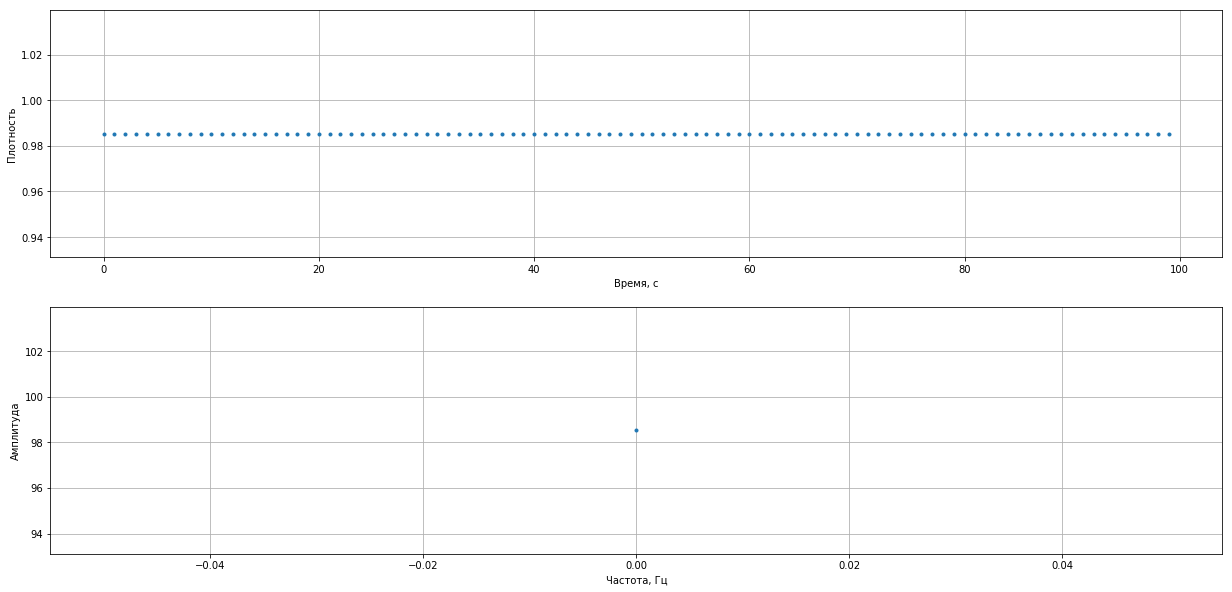

[98.53076217]


In [6]:
print('21 процент')
fourier(density2133[0])
print('*************')
print('50 процентов')
fourier(density5033[0])
print('*************')
print('70 процентов')
fourier(density7033[0])

Во всех трёх случаях колебаний плотности не наблюдается

### b=5/4

21 процент


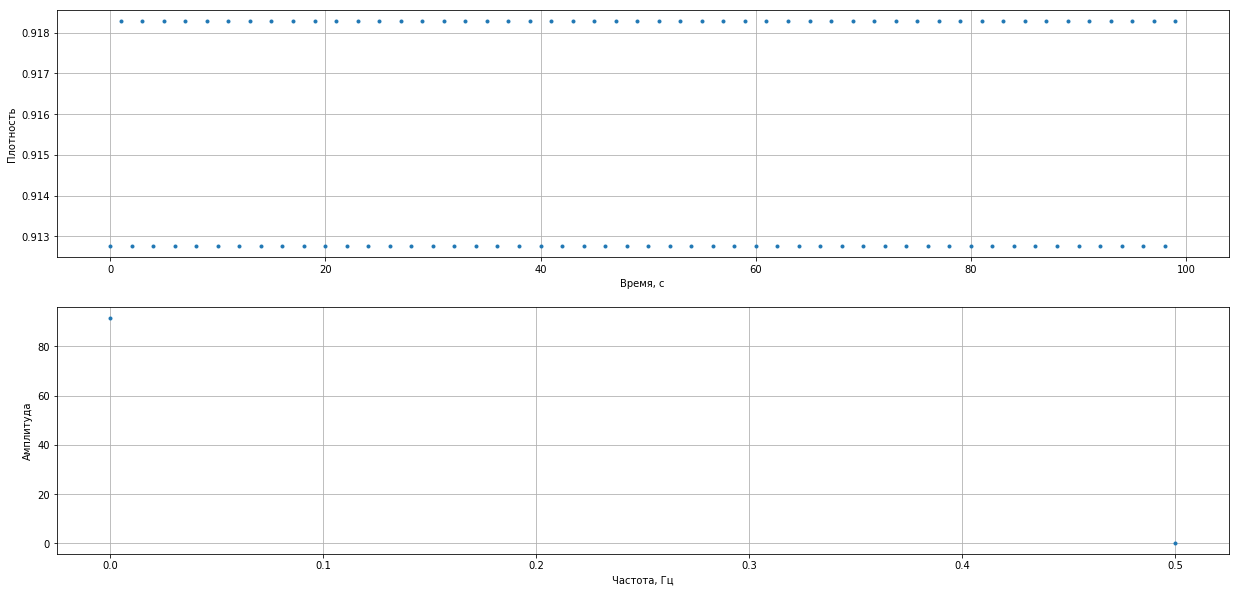

[91.55188246  0.27548209]
*************
50 процентов


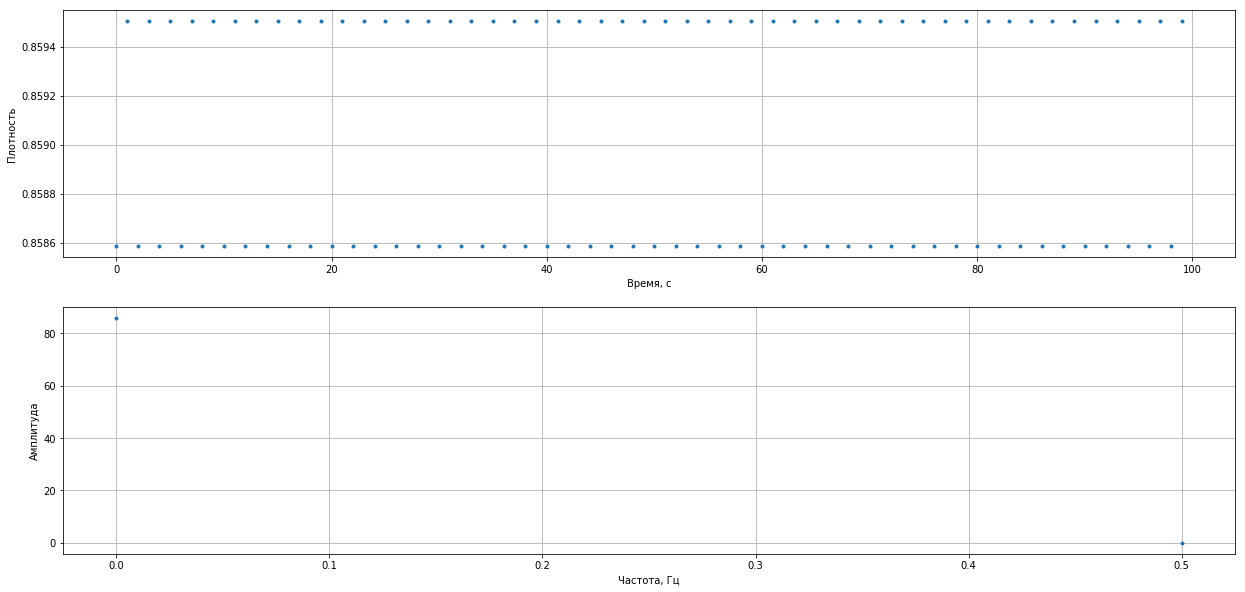

[8.59044995e+01 4.59136823e-02]
*************
70 процентов


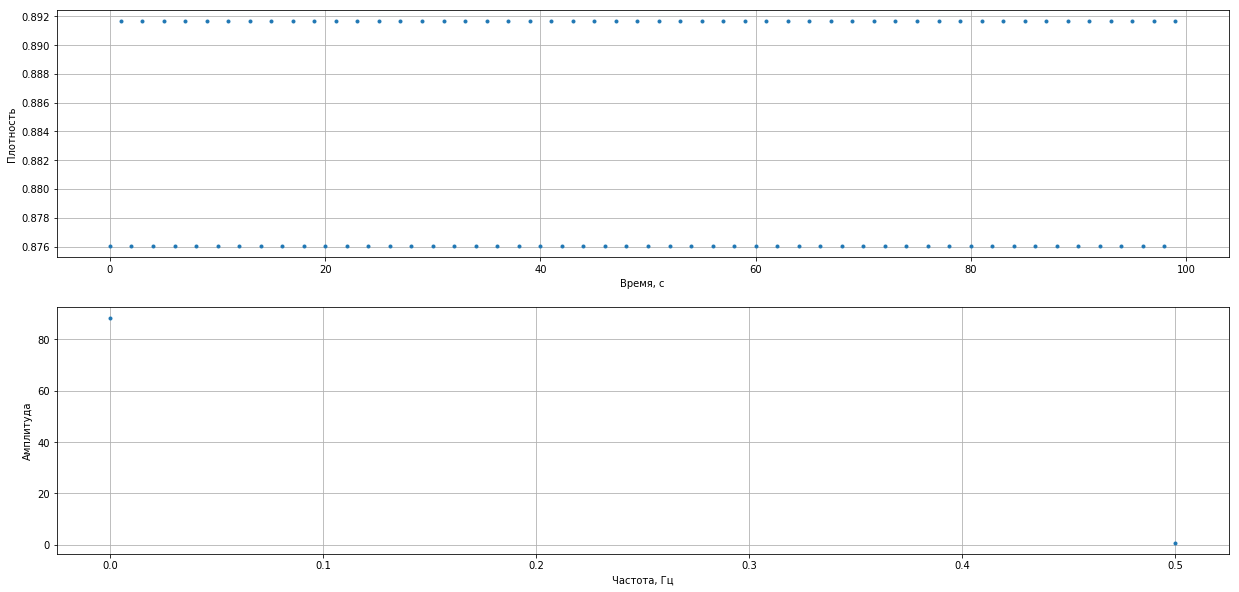

[88.38383838  0.7805326 ]


In [7]:
print('21 процент')
fourier(density2133[1])
print('*************')
print('50 процентов')
fourier(density5033[1])
print('*************')
print('70 процентов')
fourier(density7033[1])

Постоянный период

### b=4/3

21 процент


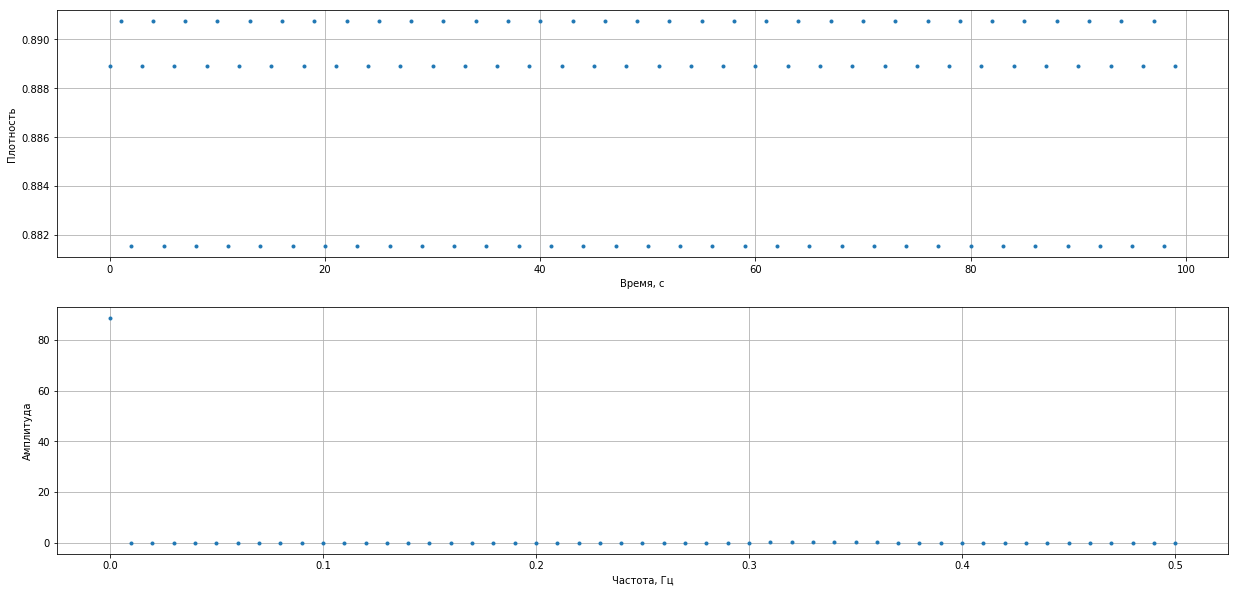

[8.87070707e+01 1.84057856e-03 1.85271183e-03 1.87306685e-03
 1.90184786e-03 1.93935083e-03 1.98597386e-03 2.04223139e-03
 2.10877279e-03 2.18640627e-03 2.27612951e-03 2.37916904e-03
 2.49703084e-03 2.63156625e-03 2.78505844e-03 2.96033744e-03
 3.16093518e-03 3.39129769e-03 3.65708073e-03 3.96556946e-03
 4.32628732e-03 4.75190179e-03 5.25961007e-03 5.87333021e-03
 6.62730153e-03 7.57227847e-03 8.78679332e-03 1.03990905e-02
 1.26337392e-02 1.59227889e-02 2.12170106e-02 3.10974770e-02
 5.58892729e-02 2.29822044e-01 1.18254441e-01 4.87307685e-02
 3.14122995e-02 2.35900050e-02 1.91630984e-02 1.63377167e-02
 1.43968030e-02 1.29979227e-02 1.19572242e-02 1.11675140e-02
 1.05624382e-02 1.00991148e-02 9.74902835e-03 9.49296837e-03
 9.31809569e-03 9.21620896e-03 9.18273646e-03]
*************
50 процентов


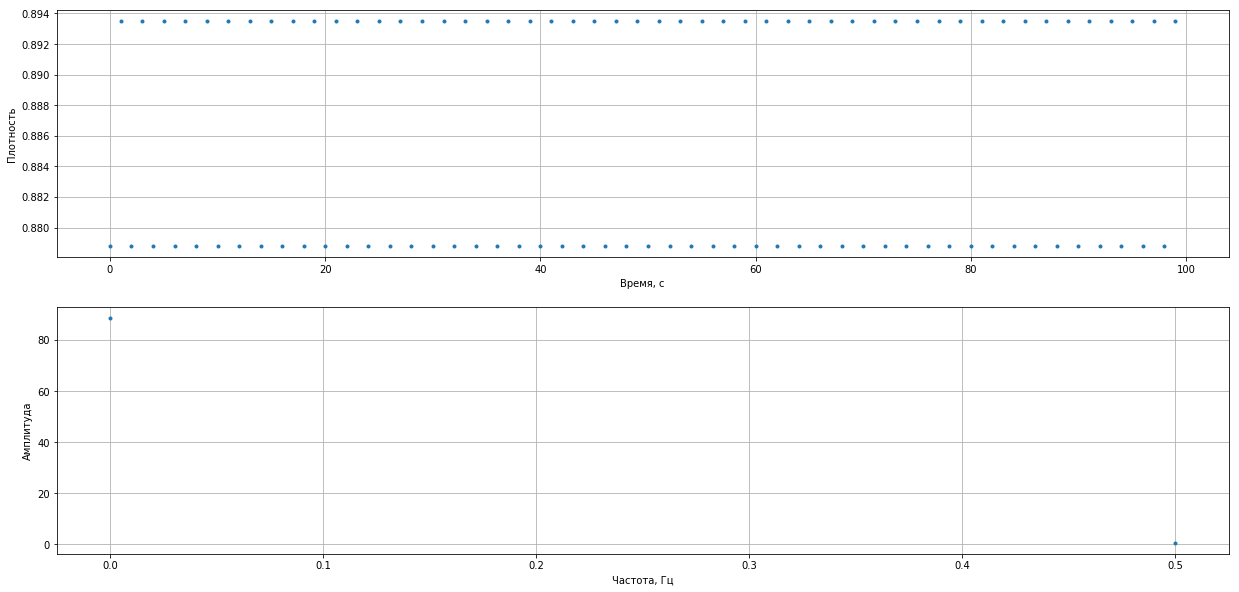

[88.6134068   0.73461892]
*************
70 процентов


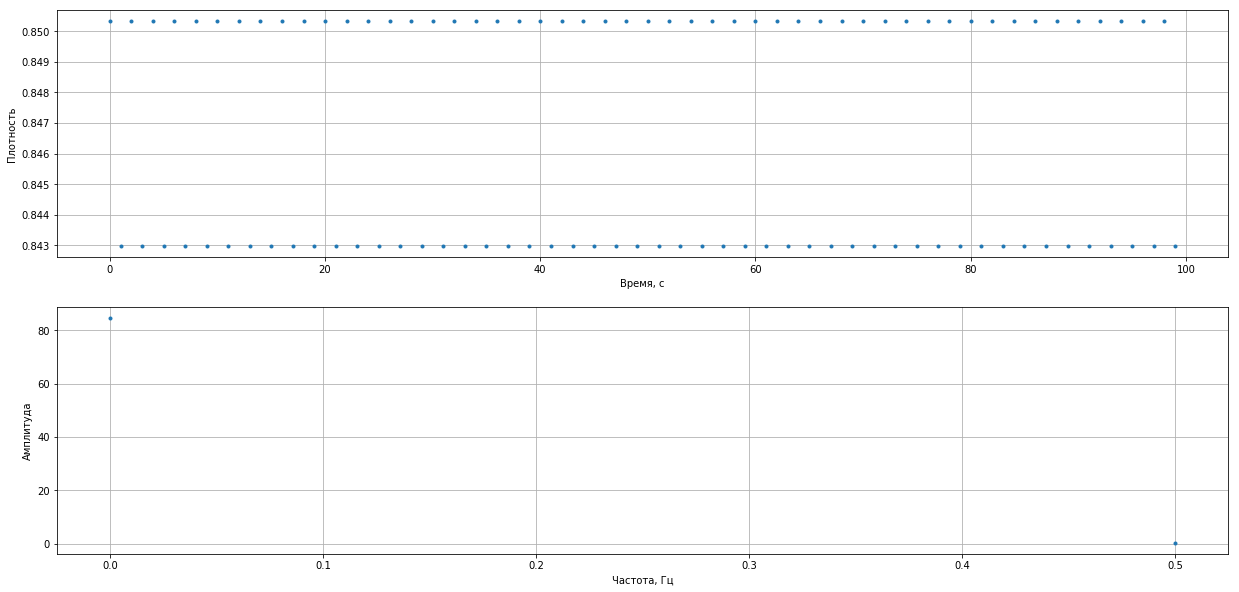

[84.66483012  0.36730946]


In [8]:
print('21 процент')
fourier(density2133[2])
print('*************')
print('50 процентов')
fourier(density5033[2])
print('*************')
print('70 процентов')
fourier(density7033[2])

В случае 50 и 70 процентов наблюдается постоянный период. В случае 21 процента наблюдается множество значений частот с ненулевыми амплитудами - сигнал получился более сложным.

### b=6/4

21 процент


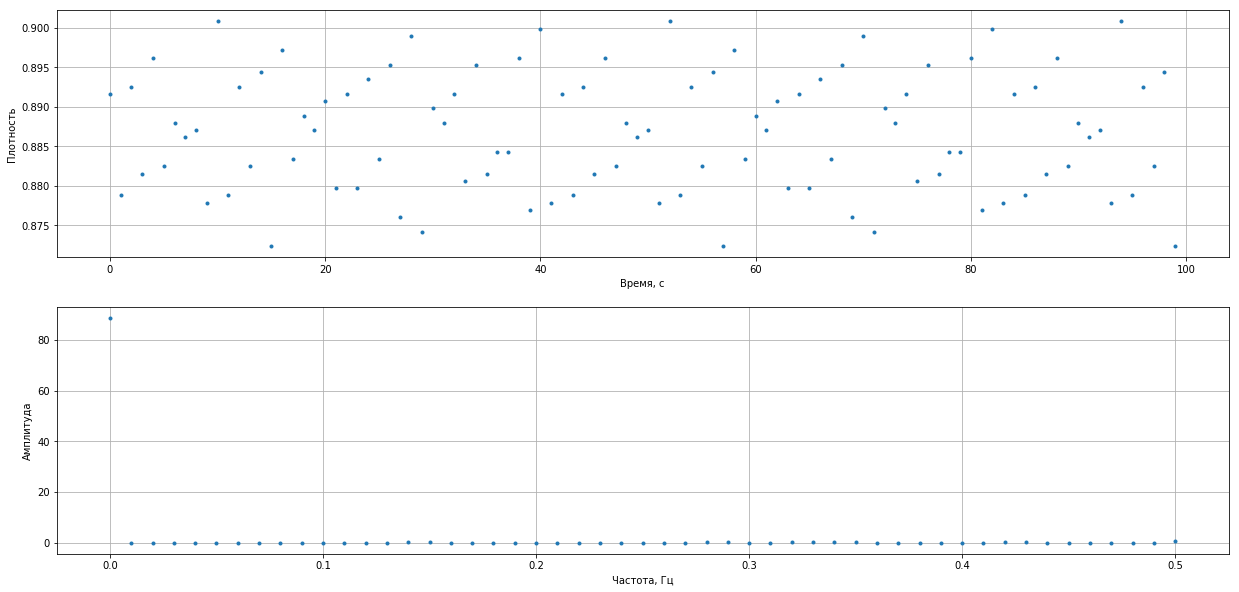

[8.86831956e+01 6.75396071e-03 6.81486317e-03 6.91999099e-03
 7.07536890e-03 7.29079827e-03 7.58176613e-03 7.97302681e-03
 8.50567828e-03 9.25232871e-03 1.03535424e-02 1.21208962e-02
 1.54107720e-02 2.37443016e-02 8.99956844e-02 2.92854891e-02
 1.14679593e-02 1.27485884e-02 3.21612790e-03 2.15888577e-03
 2.65228510e-03 3.50033846e-03 4.44733258e-03 5.52370134e-03
 6.85585044e-03 8.71150871e-03 1.17753952e-02 1.85521610e-02
 4.98955796e-02 7.11161935e-02 2.80016885e-02 2.77462802e-02
 4.31394784e-02 1.67548446e-01 8.42830593e-02 3.45631899e-02
 2.24886335e-02 1.73343019e-02 1.48056399e-02 1.37905607e-02
 1.41859905e-02 1.70348603e-02 2.94979071e-02 1.45372096e-01
 1.54426304e-02 7.29726685e-03 4.62239183e-03 3.42259499e-03
 2.82350836e-03 2.53519563e-03 6.29935721e-01]
*************
50 процентов


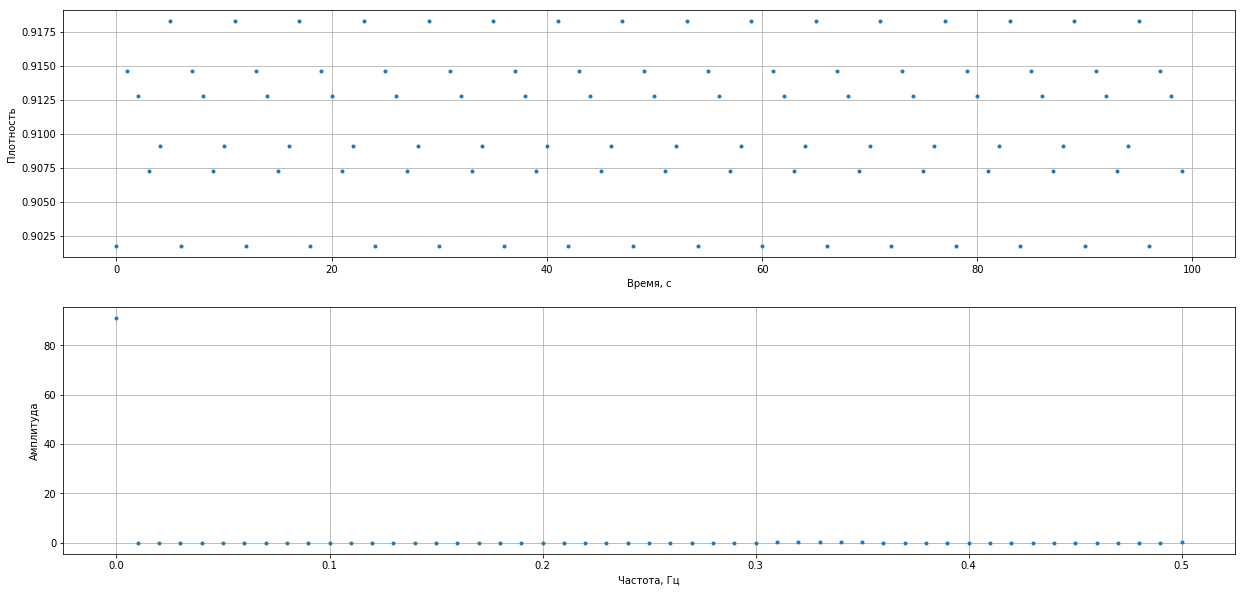

[9.10560147e+01 6.12698455e-03 6.14251834e-03 6.16858626e-03
 6.20546079e-03 6.25353380e-03 6.31332755e-03 6.38550994e-03
 6.47091463e-03 6.57056746e-03 6.68572061e-03 6.81789702e-03
 6.96894798e-03 7.14112850e-03 7.33719681e-03 7.56054682e-03
 7.81538718e-03 8.10698644e-03 8.44201468e-03 8.82902851e-03
 9.27917478e-03 9.80723698e-03 1.04332361e-02 1.11849612e-02
 1.21021280e-02 1.32435309e-02 1.47000490e-02 1.66199741e-02
 1.92628340e-02 2.31277438e-02 2.93127947e-02 4.07985954e-02
 6.95077722e-02 2.70435614e-01 1.31395180e-01 5.10169013e-02
 3.09138768e-02 2.17698570e-02 1.65402469e-02 1.31538089e-02
 1.07829158e-02 9.03284081e-03 7.69243689e-03 6.63972303e-03
 5.80075712e-03 5.12983794e-03 4.59920464e-03 4.19321082e-03
 3.90452472e-03 3.73105298e-03 2.71808999e-01]
*************
70 процентов


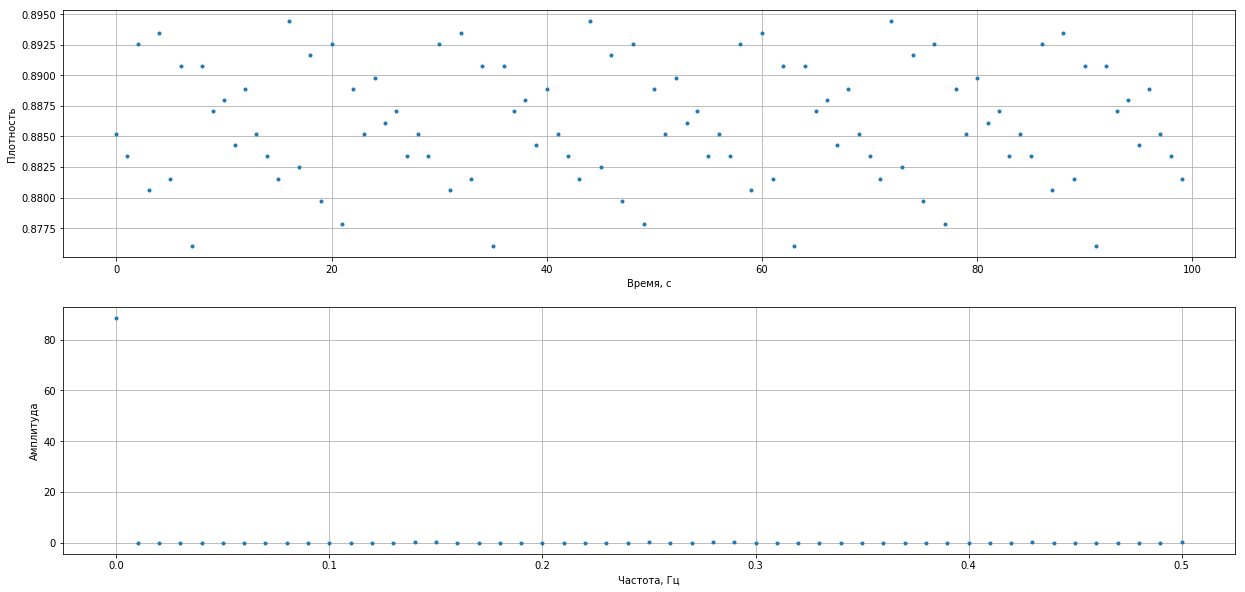

[8.86078972e+01 5.52794870e-03 5.58387493e-03 5.68059083e-03
 5.82393608e-03 6.02343647e-03 6.29419455e-03 6.66044481e-03
 7.16259434e-03 7.87234595e-03 8.92910783e-03 1.06430873e-02
 1.38694776e-02 2.21304721e-02 8.83149184e-02 3.09127434e-02
 1.11475530e-02 6.11267643e-03 4.06142122e-03 3.27723421e-03
 3.21492235e-03 3.57362575e-03 4.20402356e-03 5.09035387e-03
 6.33410553e-03 6.79770634e-02 1.14688209e-02 1.87438520e-02
 5.11969077e-02 6.74999804e-02 1.99594702e-02 1.15538219e-02
 8.06011331e-03 6.17495010e-03 5.04158698e-03 4.35490565e-03
 4.00099440e-03 3.95867646e-03 4.27526210e-03 5.09346464e-03
 6.79414814e-03 1.06374939e-02 2.38919208e-02 1.50332462e-01
 1.98715952e-02 1.12920798e-02 8.27154069e-03 6.80952596e-03
 6.02752381e-03 5.63158407e-03 3.61799816e-01]


In [9]:
print('21 процент')
fourier(density2133[3])
print('*************')
print('50 процентов')
fourier(density5033[3])
print('*************')
print('70 процентов')
fourier(density7033[3])

### b=5/3

21 процент


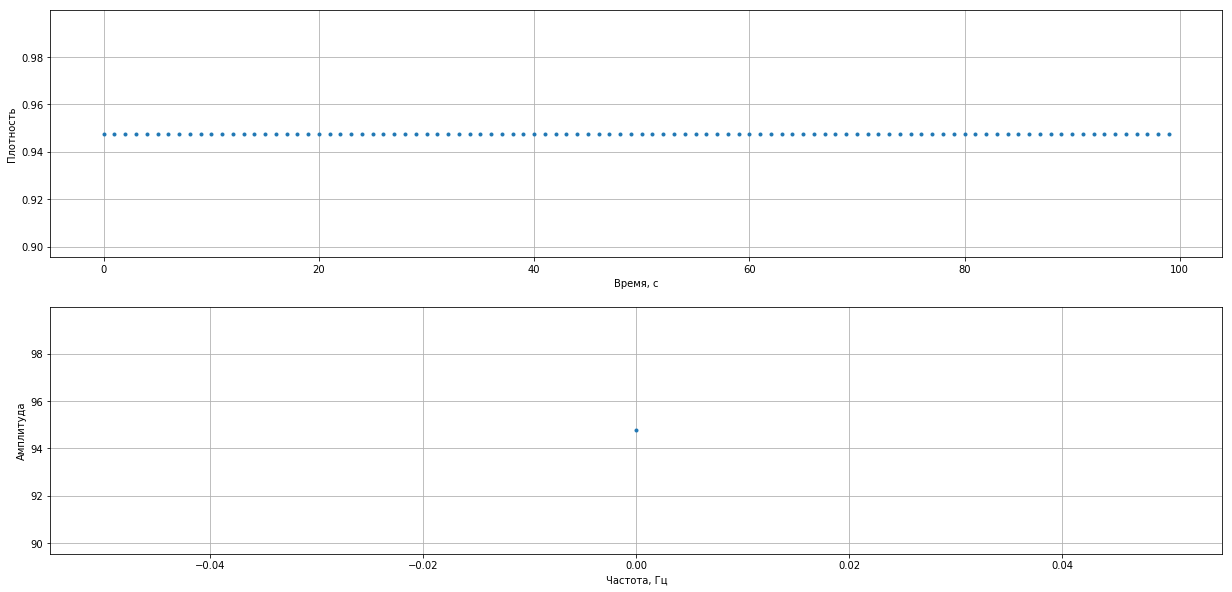

[94.76584022]
*************
50 процентов


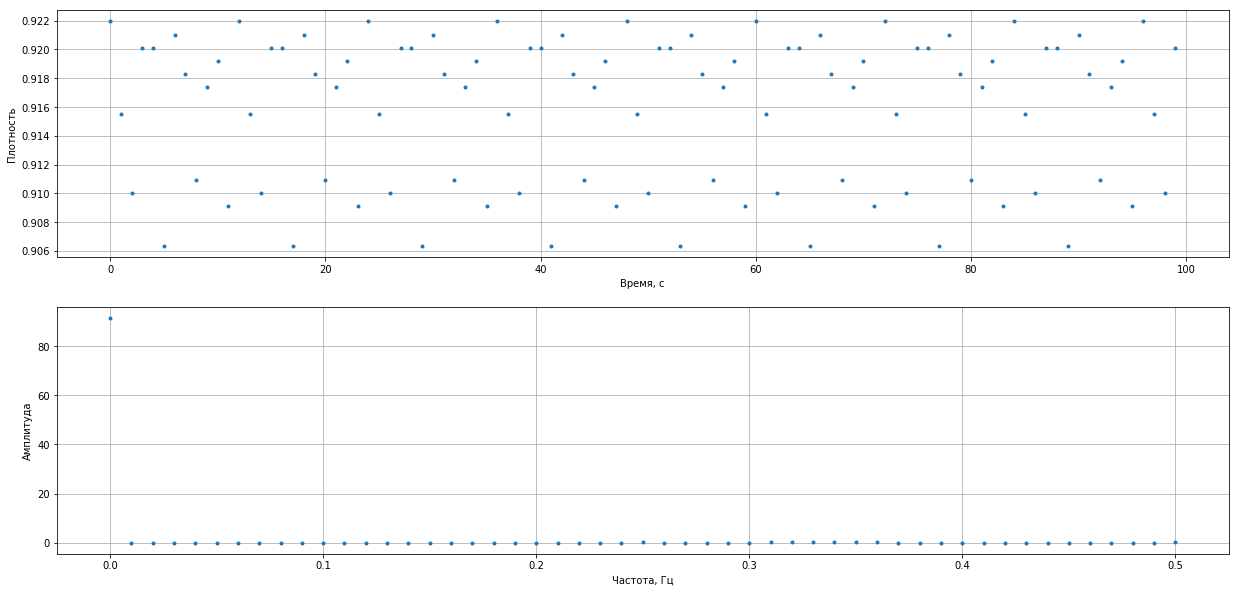

[9.15867769e+01 4.28988486e-03 4.30376168e-03 4.32706873e-03
 4.36007984e-03 4.40318920e-03 4.45692284e-03 4.52195451e-03
 4.59912674e-03 4.68947835e-03 4.79428027e-03 4.91508189e-03
 5.05377140e-03 5.21265478e-03 5.39456005e-03 5.60297627e-03
 5.84224145e-03 6.11779999e-03 6.43656167e-03 6.80741133e-03
 7.24194874e-03 7.75558900e-03 8.36924630e-03 9.11199615e-03
 1.00254501e-02 7.84465864e-02 1.26449079e-02 1.46021452e-02
 1.73158371e-02 2.13109101e-02 2.77425265e-02 3.97466392e-02
 6.98680625e-02 2.81193890e-01 1.41713896e-01 5.72432328e-02
 3.62009834e-02 2.66963125e-02 2.13168796e-02 1.78831961e-02
 1.55240780e-02 1.38235016e-02 1.25581193e-02 1.15977201e-02
 1.08617115e-02 1.02980163e-02 9.87201030e-03 9.56037111e-03
 9.34751399e-03 9.22348512e-03 1.28558310e-01]
*************
70 процентов


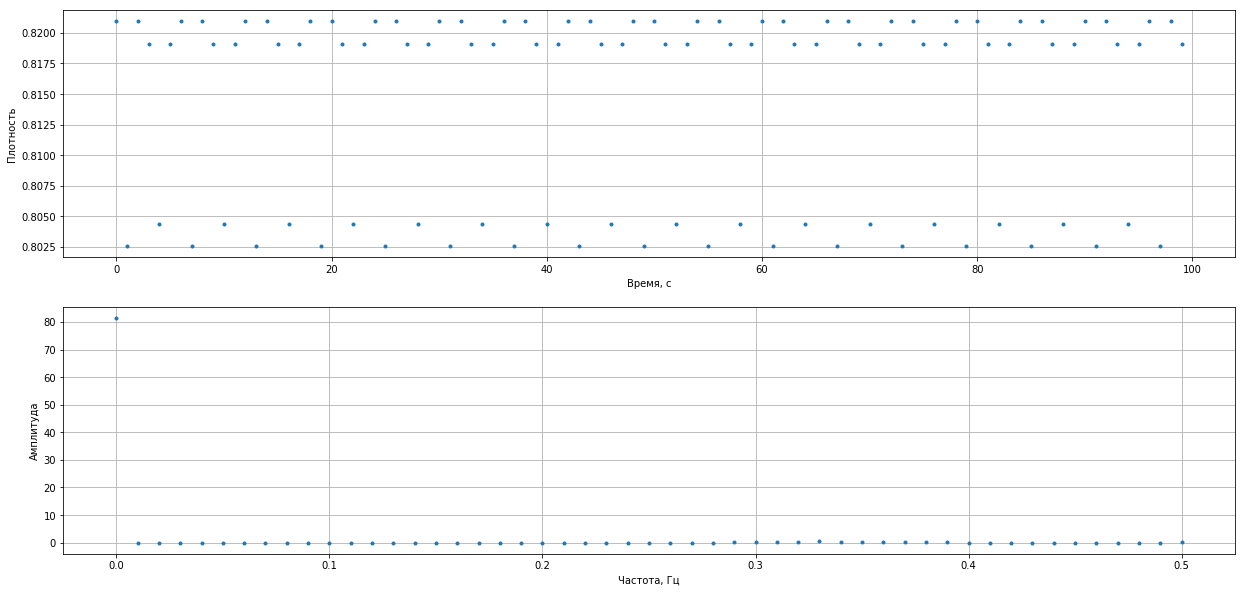

[8.14563820e+01 5.51689943e-03 5.53875838e-03 5.57547993e-03
 5.62750754e-03 5.69547962e-03 5.78024810e-03 5.88290409e-03
 6.00481196e-03 6.14765390e-03 6.31348779e-03 6.50482225e-03
 6.72471422e-03 6.97689671e-03 7.26594734e-03 7.59751320e-03
 7.97861462e-03 8.41806150e-03 8.92703357e-03 9.51990447e-03
 1.02154378e-02 1.10385661e-02 1.20231124e-02 1.32160940e-02
 1.46847939e-02 1.65289256e-02 1.89027530e-02 2.20581689e-02
 2.64362407e-02 3.28855163e-02 4.32732891e-02 6.26686997e-02
 1.11349824e-01 4.52938463e-01 2.30678262e-01 9.41440913e-02
 6.01384287e-02 4.47824027e-02 3.60943021e-02 3.05510471e-02
 2.67443635e-02 2.40017210e-02 2.19620412e-02 2.04147988e-02
 1.92296765e-02 1.83224552e-02 1.76371315e-02 1.71359761e-02
 1.67937735e-02 1.65944162e-02 1.08356290e-01]


In [10]:
print('21 процент')
fourier(density2133[4])
print('*************')
print('50 процентов')
fourier(density5033[4])
print('*************')
print('70 процентов')
fourier(density7033[4])

### b=7/4

21 процент


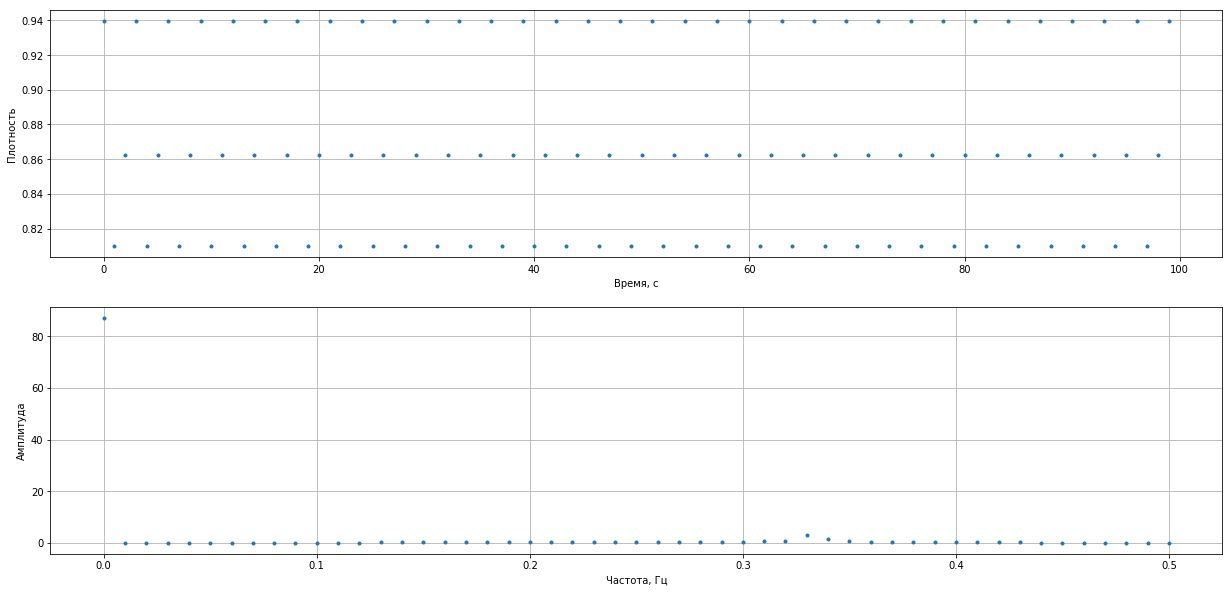

[8.71212121e+01 6.89293991e-02 6.91066373e-02 6.94040886e-02
 6.98248926e-02 7.03735654e-02 7.10561271e-02 7.18802775e-02
 7.28556300e-02 7.39940167e-02 7.53098855e-02 7.68208129e-02
 7.85481727e-02 8.05180095e-02 8.27621910e-02 8.53199453e-02
 8.82399360e-02 9.15831066e-02 9.54266426e-02 9.98695986e-02
 1.05041063e-01 1.11112302e-01 1.18315334e-01 1.26972306e-01
 1.37543752e-01 1.50711618e-01 1.67530232e-01 1.89720305e-01
 2.20293739e-01 2.65043582e-01 3.36716003e-01 4.69910345e-01
 8.03029823e-01 3.13534665e+00 1.52952033e+00 5.96648204e-01
 3.63507391e-01 2.57609343e-01 1.97179253e-01 1.58175991e-01
 1.30994857e-01 1.11055982e-01 9.59093525e-02 8.41376501e-02
 7.48770540e-02 6.75850037e-02 6.19178818e-02 5.76614178e-02
 5.46876043e-02 5.29256418e-02 5.23415978e-02]
*************
50 процентов


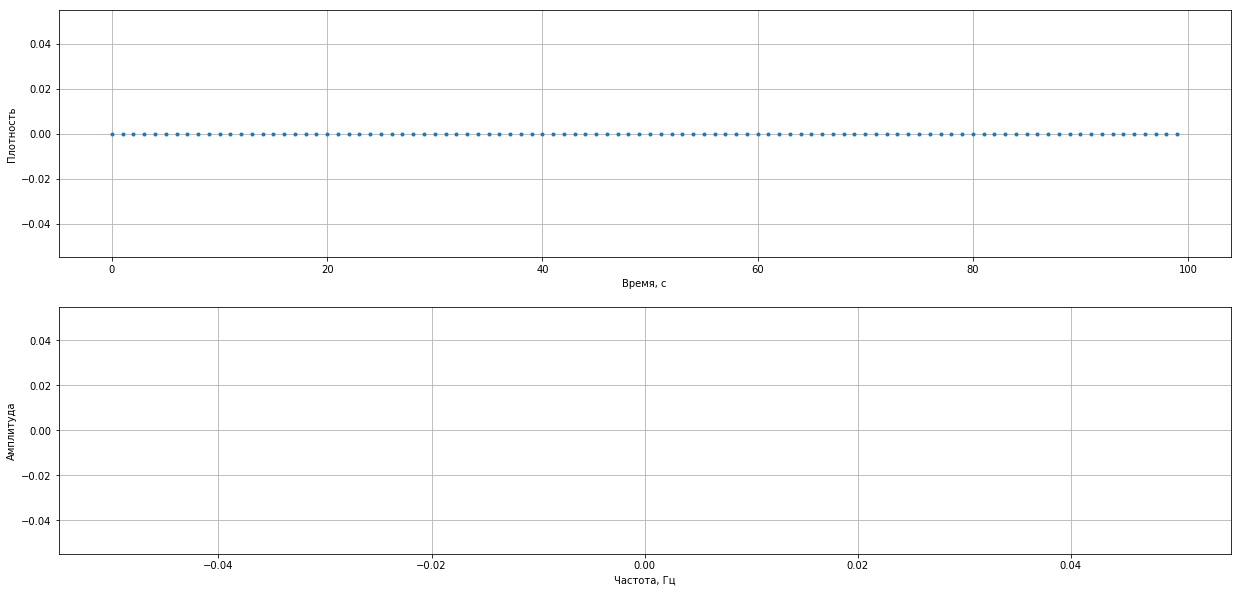

[]
*************
70 процентов


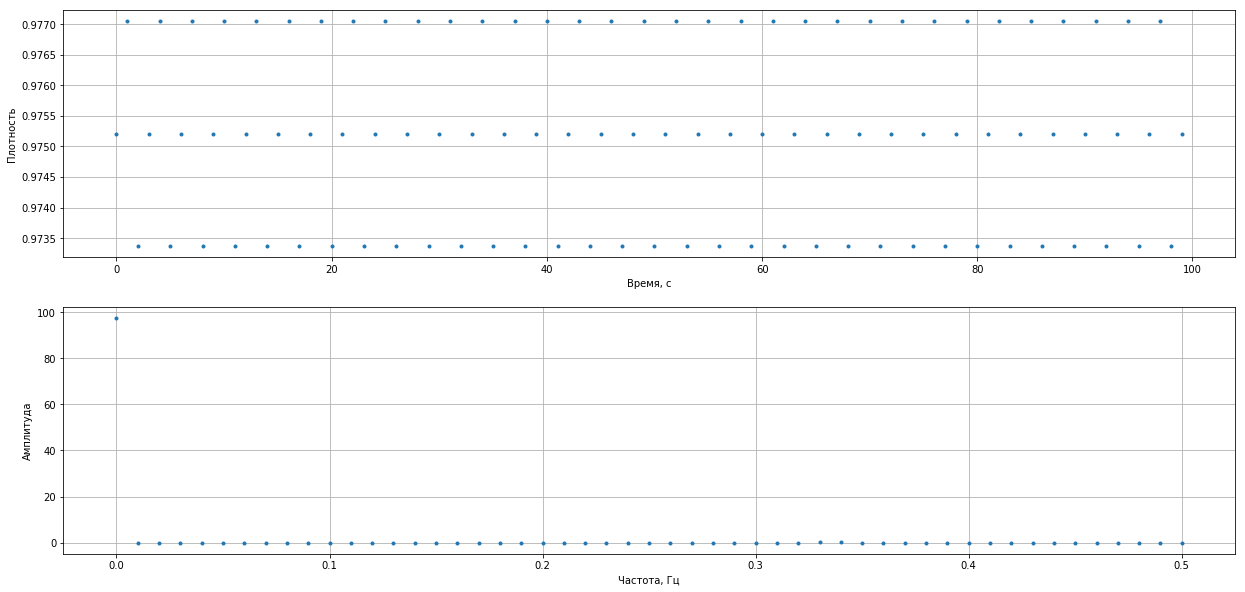

[9.75206612e+01 3.85088887e-05 7.72847814e-05 1.16599780e-04
 1.56736381e-04 1.97993179e-04 2.40691219e-04 2.85181281e-04
 3.31852446e-04 3.81142391e-04 4.33550005e-04 4.89651102e-04
 5.50118315e-04 6.15746625e-04 6.87486647e-04 7.66488625e-04
 8.54161535e-04 9.52253766e-04 1.06296529e-03 1.18910668e-03
 1.33432971e-03 1.50347001e-03 1.70307117e-03 1.94221329e-03
 2.23387404e-03 2.59727009e-03 3.06211420e-03 3.67690592e-03
 4.52654967e-03 5.77436790e-03 7.77973917e-03 1.15182365e-02
 2.08923924e-02 8.66362602e-02 4.49210894e-02 1.86406666e-02
 1.20921949e-02 9.13316827e-03 7.45769630e-03 6.38775392e-03
 5.65231136e-03 5.12193359e-03 4.72712518e-03 4.42736540e-03
 4.19757025e-03 4.02152786e-03 3.88845720e-03 3.79109468e-03
 3.72458551e-03 3.68582841e-03 3.67309458e-03]


In [11]:
print('21 процент')
fourier(density2133[5])
print('*************')
print('50 процентов')
fourier(density5033[5])
print('*************')
print('70 процентов')
fourier(density7033[5])

При 50 процентах кооператоры исчезают

### b=2

21 процент


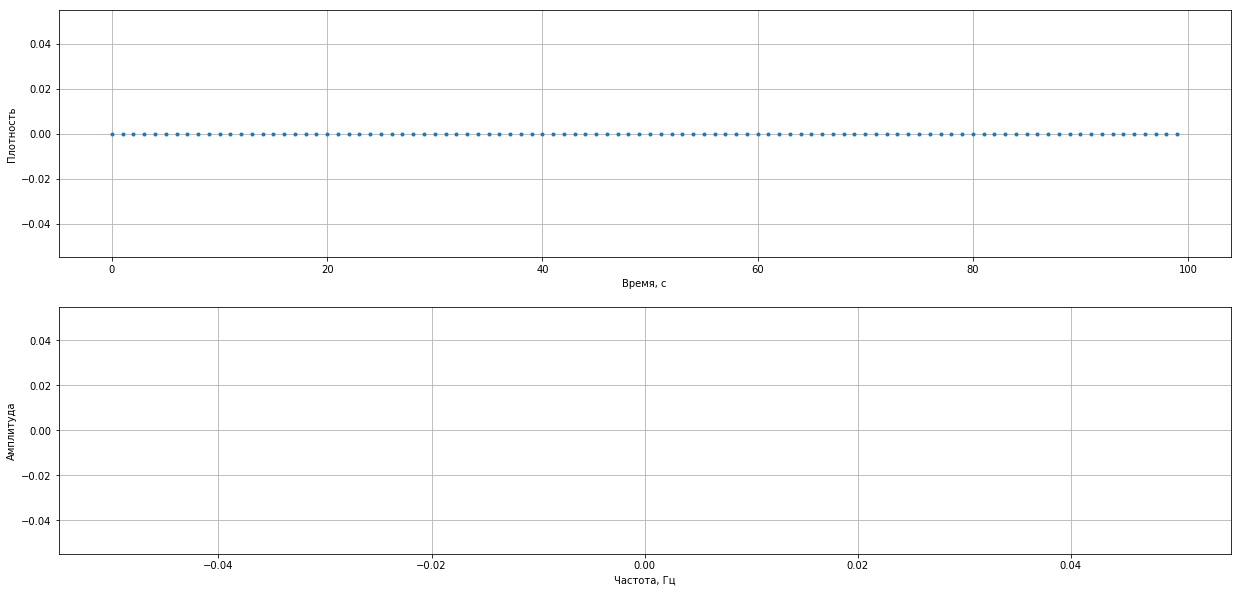

[]
*************
50 процентов


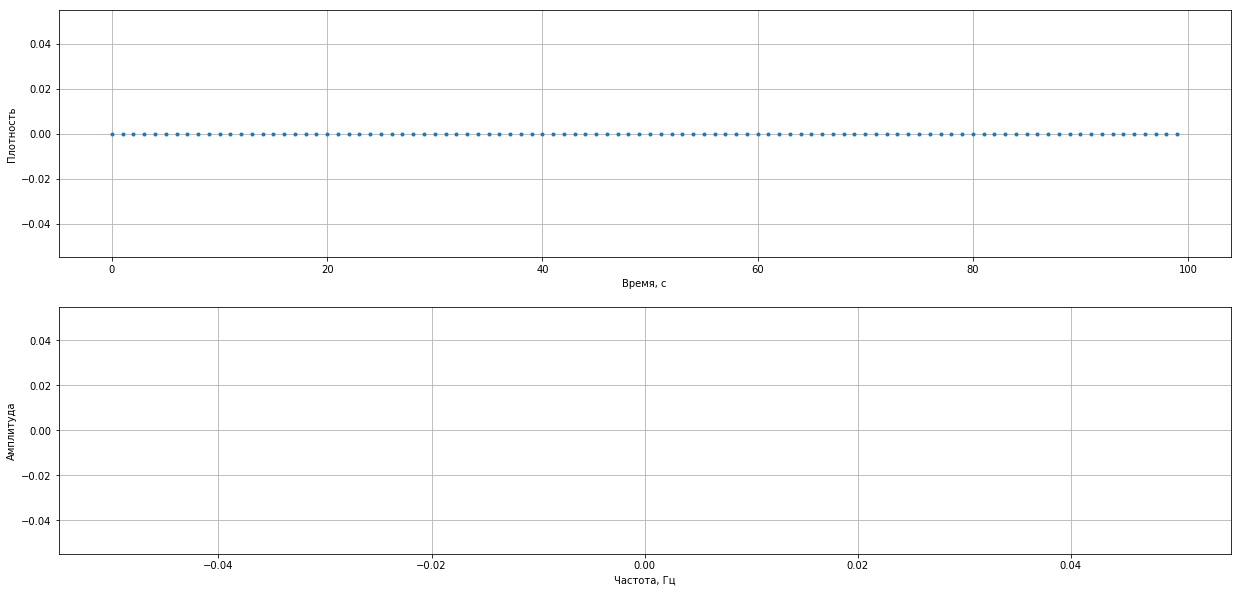

[]
*************
70 процентов


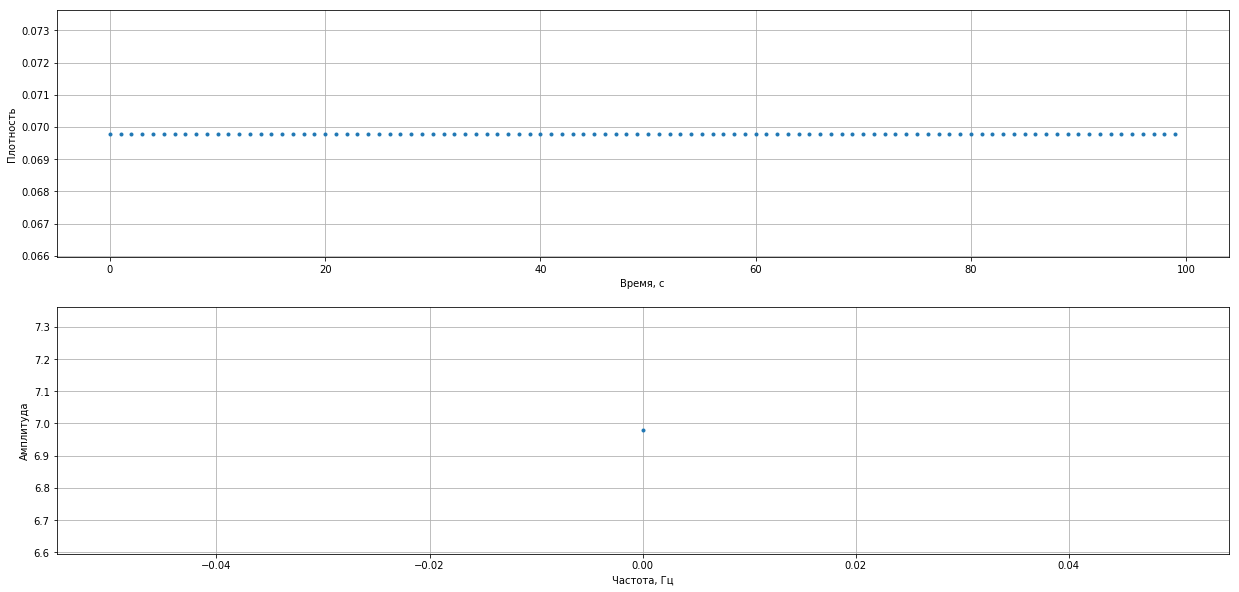

[6.97887971]


In [12]:
print('21 процент')
fourier(density2133[6])
print('*************')
print('50 процентов')
fourier(density5033[6])
print('*************')
print('70 процентов')
fourier(density7033[6])

### b=7/3

21 процент


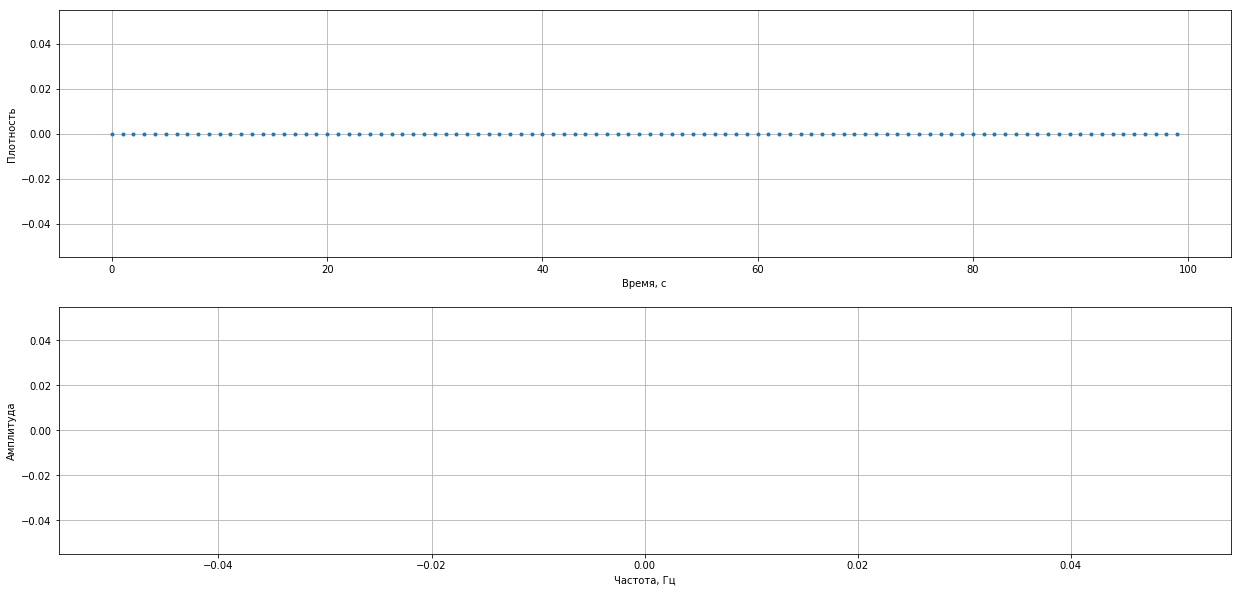

[]
*************
50 процентов


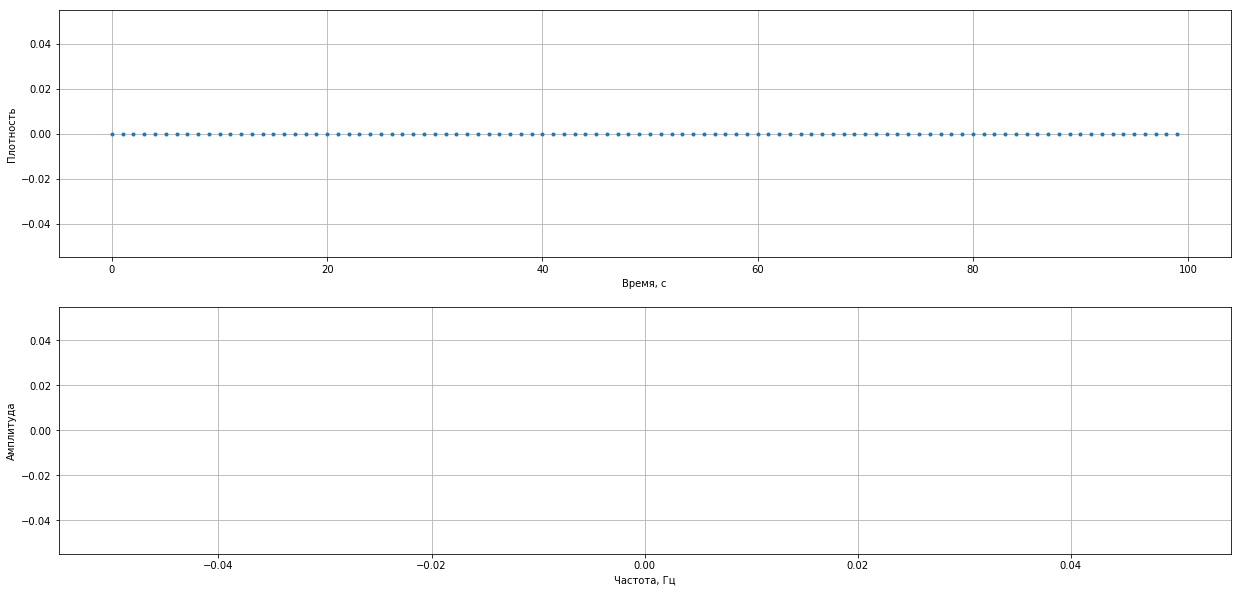

[]
*************
70 процентов


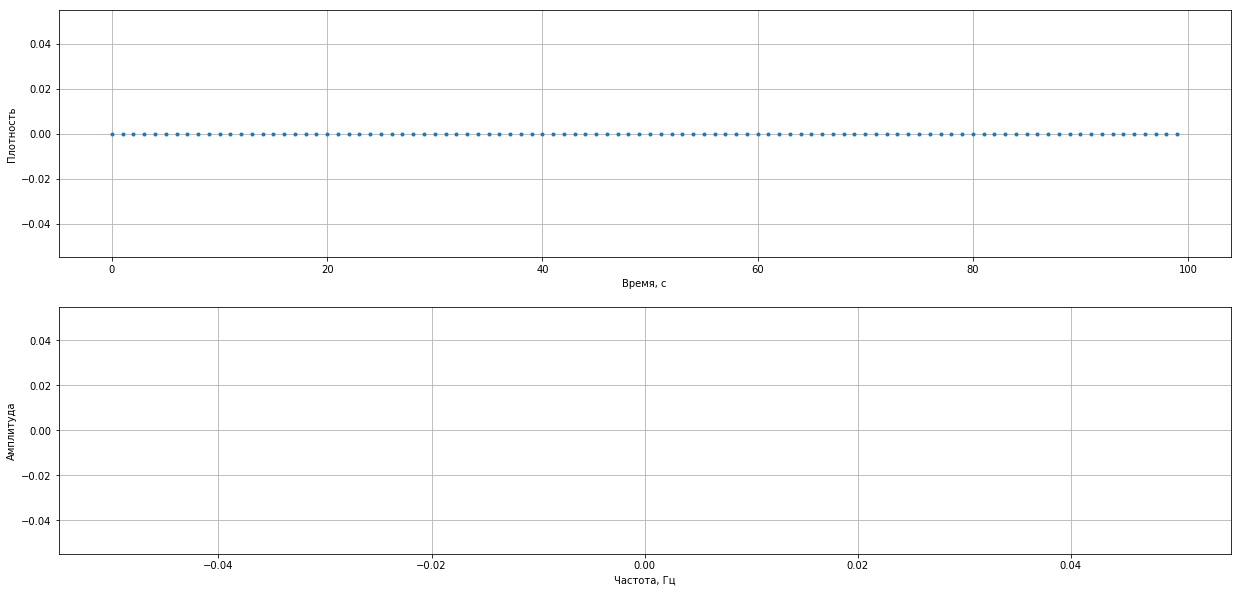

[]


In [13]:
print('21 процент')
fourier(density2133[7])
print('*************')
print('50 процентов')
fourier(density5033[7])
print('*************')
print('70 процентов')
fourier(density7033[7])

при таком значении b кооператоров нет нигде

Вывод: результаты зависят от начального количества кооператоров

## Сравнение двух полей

### Поле 72x72 сравнивается с полем 33x33, b=7/3 

21 процент


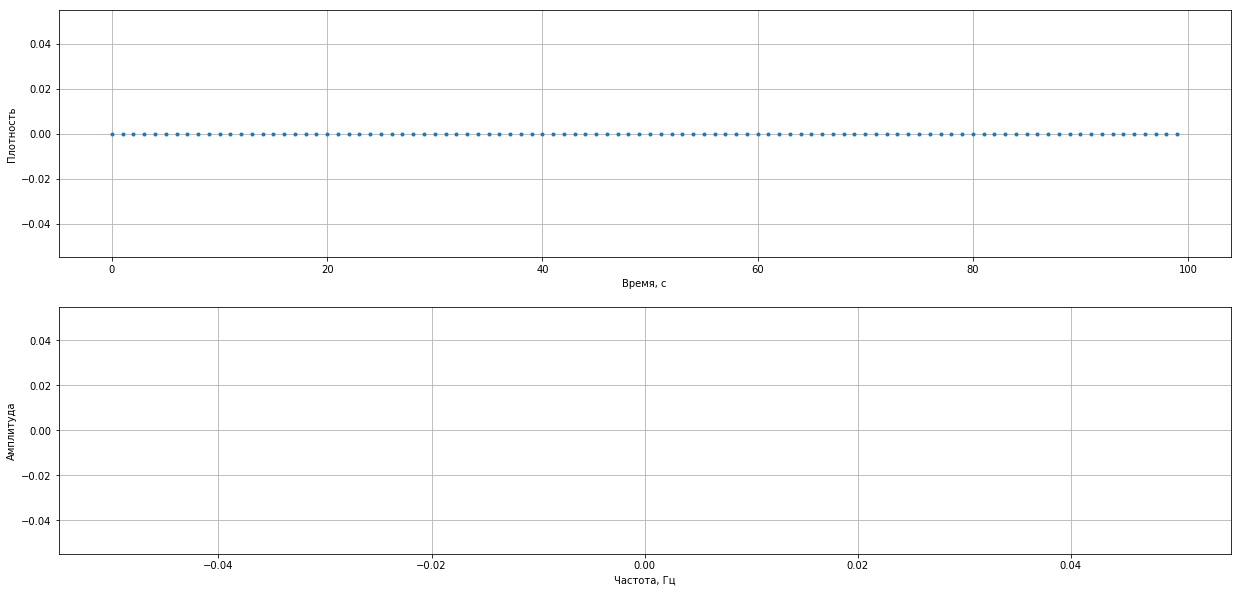

[]
*************
50 процентов


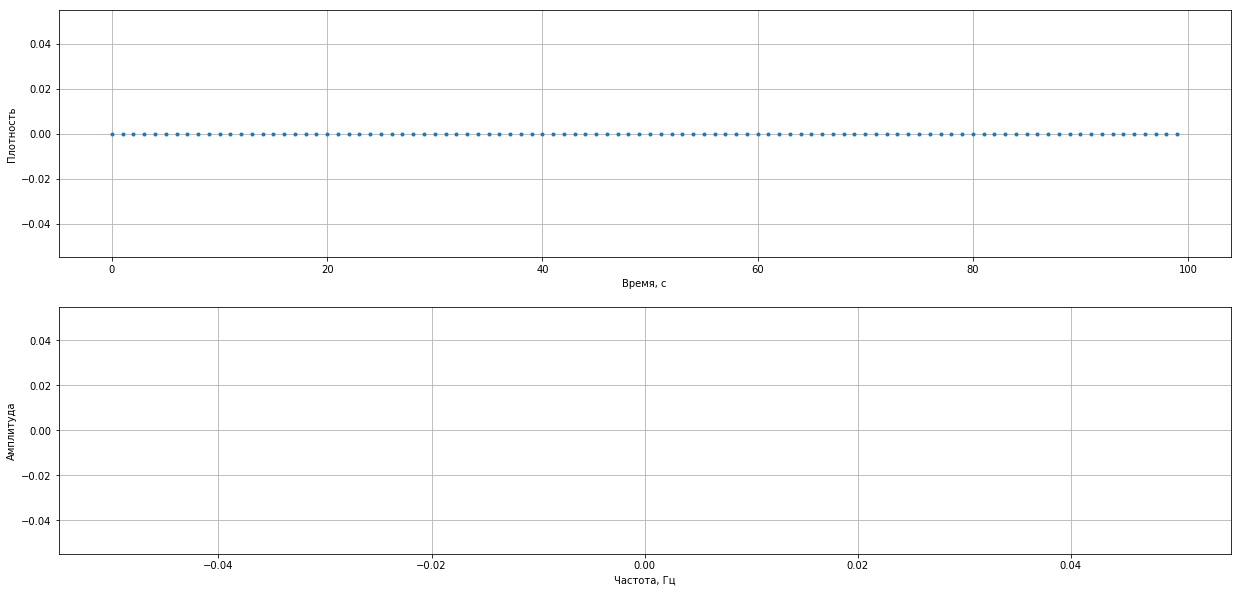

[]
*************
70 процентов


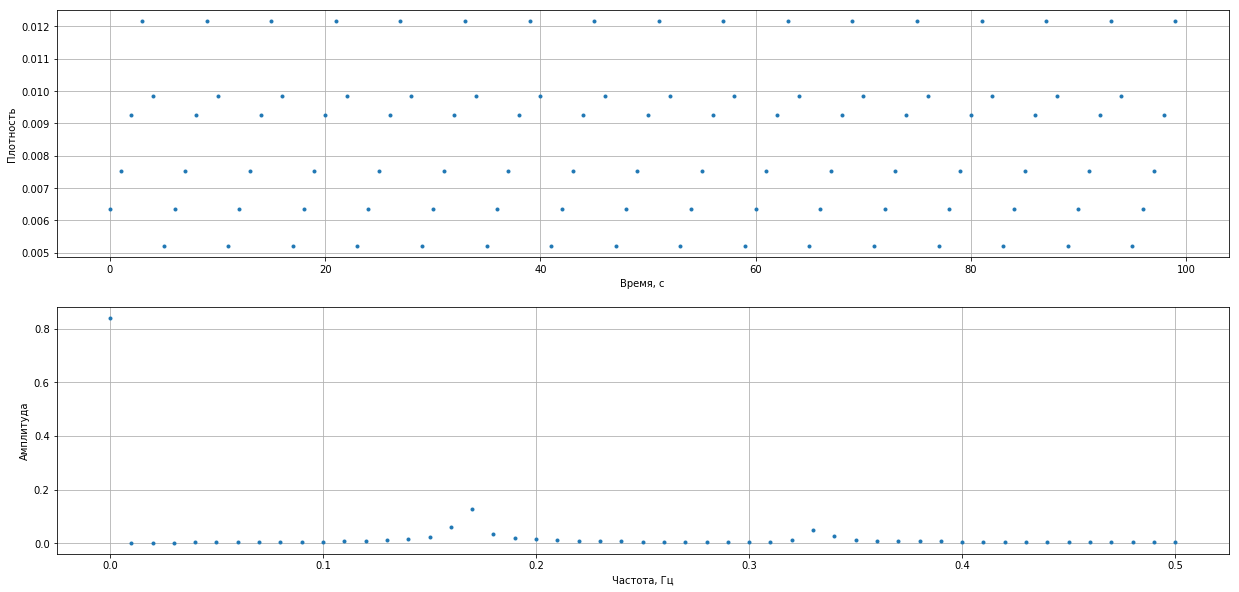

[0.84085648 0.00176518 0.00185196 0.00199573 0.00219679 0.00245796
 0.00278614 0.00319406 0.003703   0.00434754 0.00518483 0.00631378
 0.00791927 0.01038879 0.01469179 0.02412504 0.06176612 0.12623669
 0.0321791  0.0187063  0.01328854 0.01034594 0.0084829  0.00718474
 0.00621731 0.00545948 0.00484472 0.00434056 0.00394967 0.0037417
 0.00395596 0.00527536 0.01004159 0.04706208 0.02784586 0.01300637
 0.00932805 0.00766188 0.00670964 0.00609293 0.00566182 0.00534526
 0.00510531 0.00491997 0.00477562 0.00466347 0.00457768 0.0045143
 0.00447068 0.00444514 0.00520833]


In [14]:
print('21 процент')
fourier(density2172[7])
print('*************')
print('50 процентов')
fourier(density5072[7])
print('*************')
print('70 процентов')
fourier(density7072[7])

При сравнении поля 72x72 c полем 33x33 для b=7/3 выяснилось, что есть разница для начального процента кооператоров=70

### Поле 15x15 сравнивается с полем 33x33, b=7/3 

21 процент


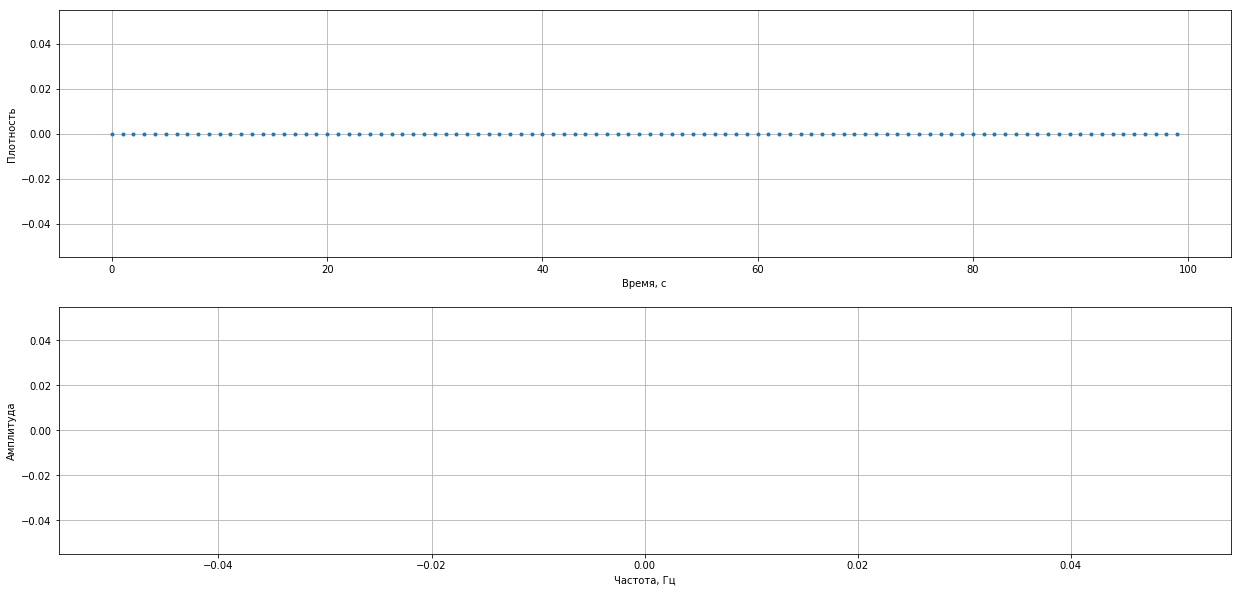

[]
*************
50 процентов


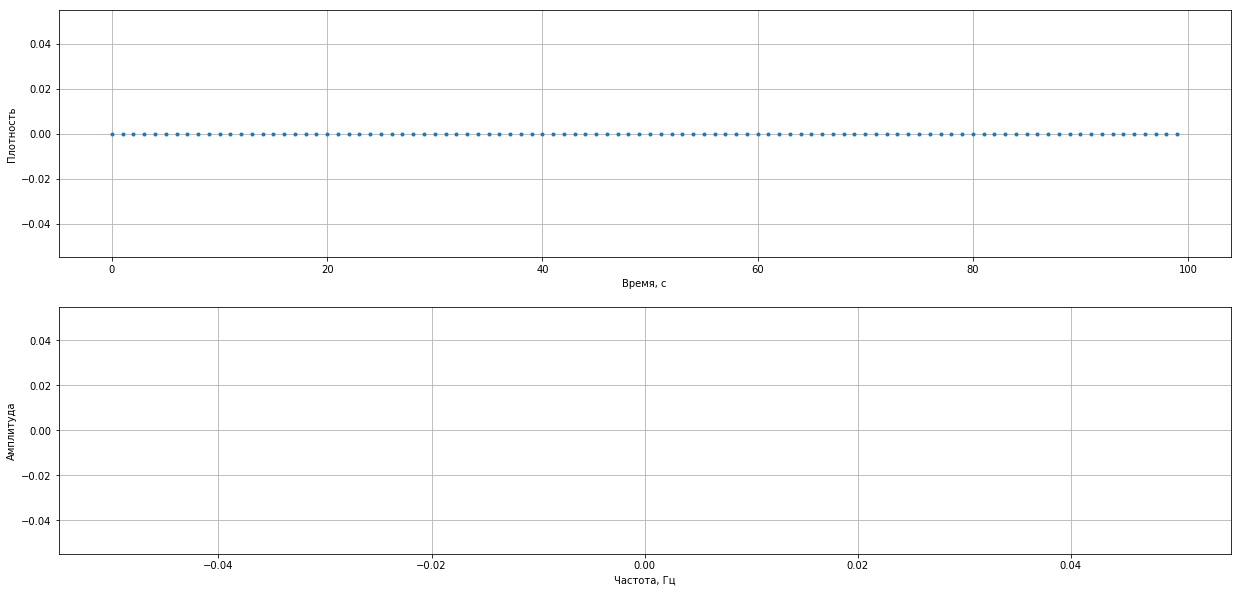

[]
*************
70 процентов


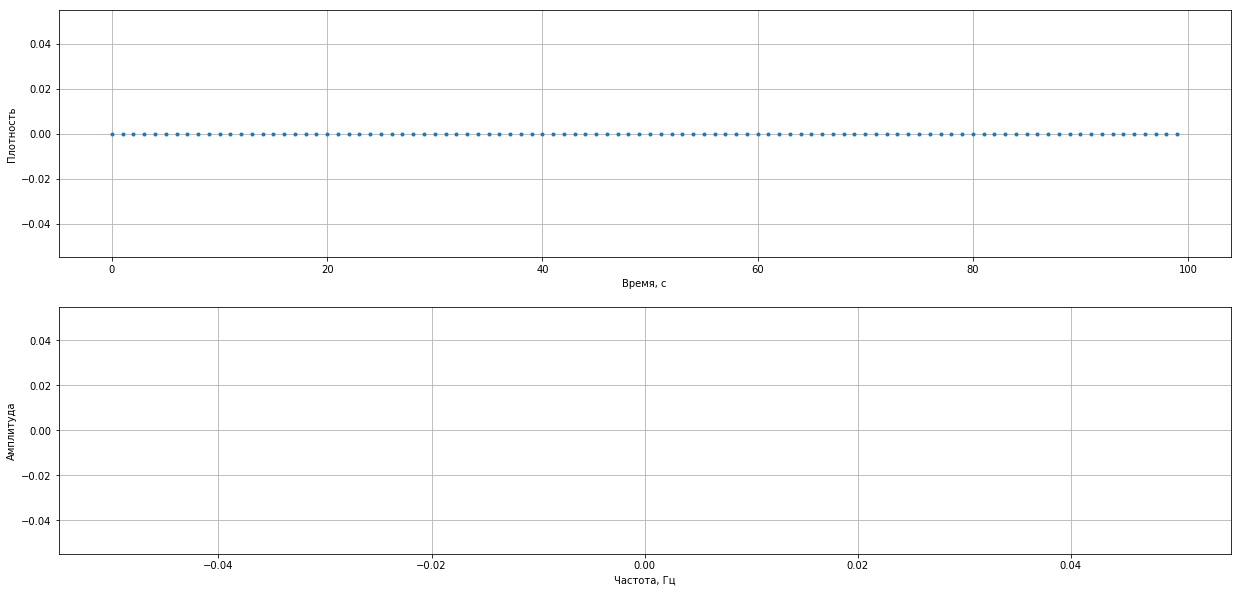

[]


In [15]:
print('21 процент')
fourier(density2115[7])
print('*************')
print('50 процентов')
fourier(density5015[7])
print('*************')
print('70 процентов')
fourier(density7015[7])

Ненулевое значение плотности для 70 процентов появилось только при большом размере поля

Результат зависит от размера поля

## Разные seed

In [16]:
seed1 = c_density(size=33, percentage=21, burnin=5000,seed=1)
seed4= c_density(size=33, percentage=21, burnin=5000,seed=4)
seed12 = c_density(size=33, percentage=21, burnin=5000,seed=12)

### b=1

seed=1


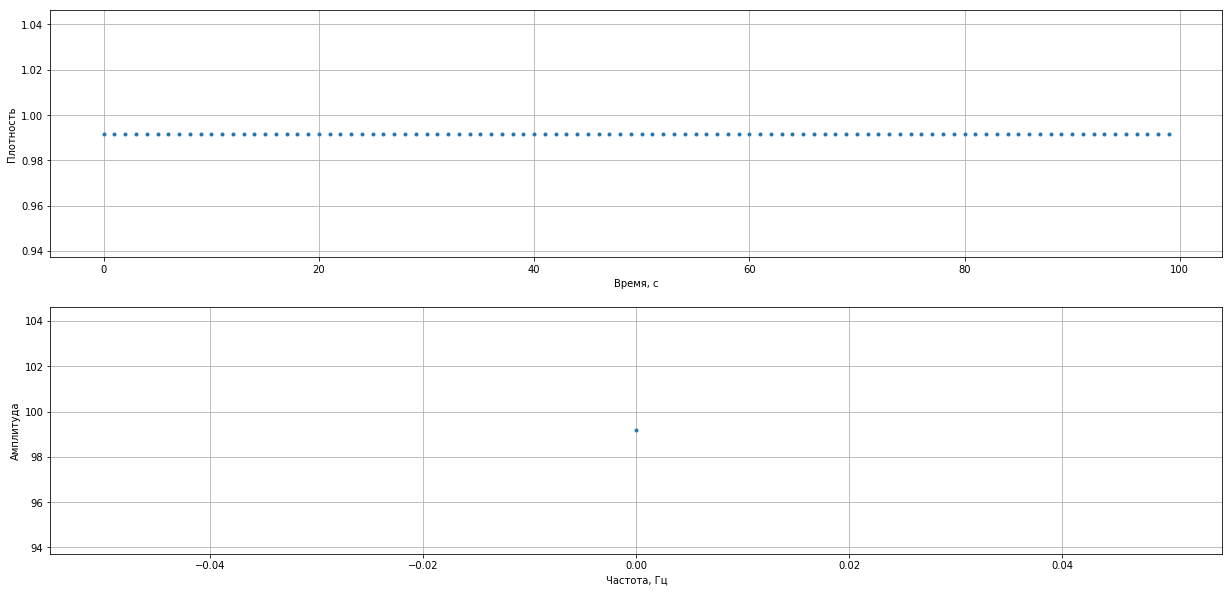

[99.17355372]
*************
seed=4


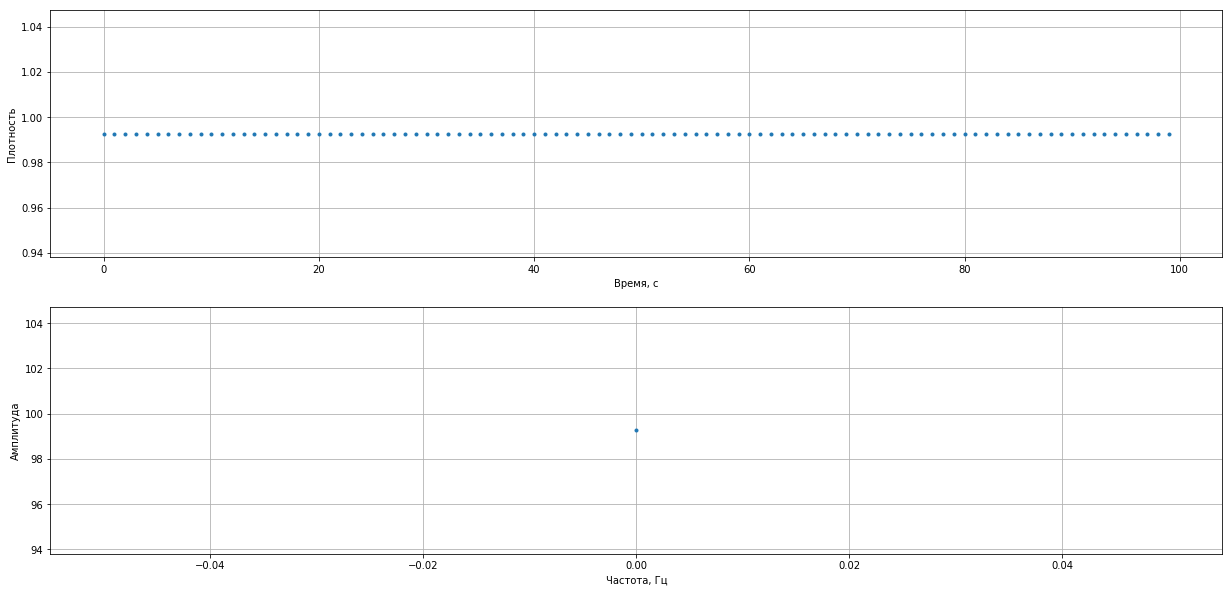

[99.26538108]
*************
seed=12


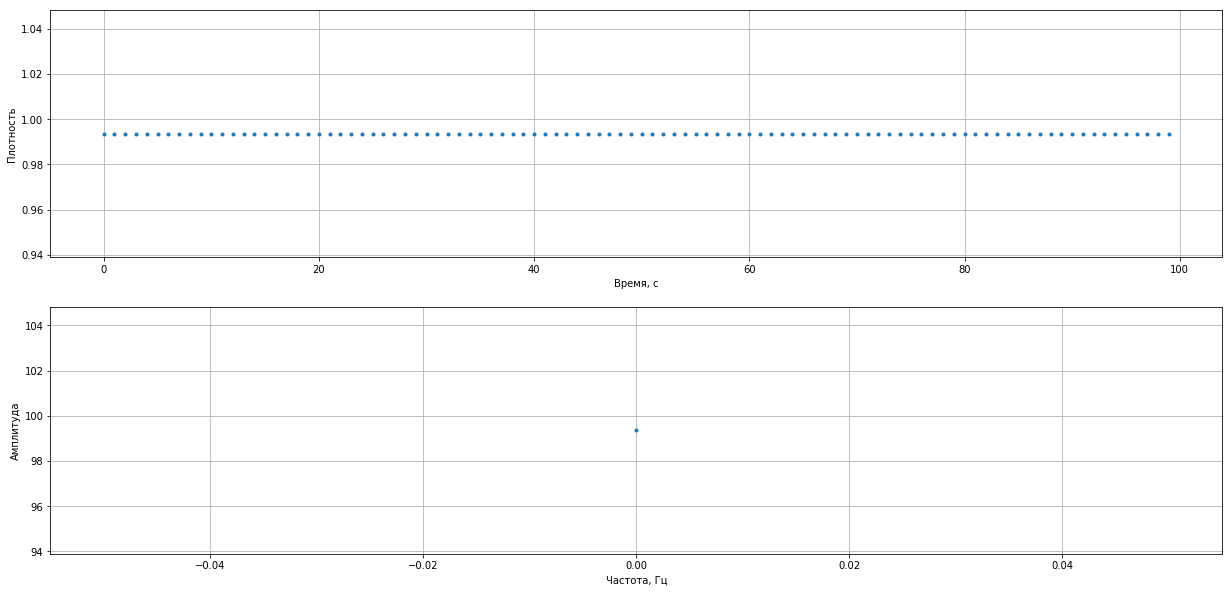

[99.35720845]


In [17]:
print('seed=1')
fourier(seed1[0])
print('*************')
print('seed=4')
fourier(seed4[0])
print('*************')
print('seed=12')
fourier(seed12[0])

### b=5/4

seed=1


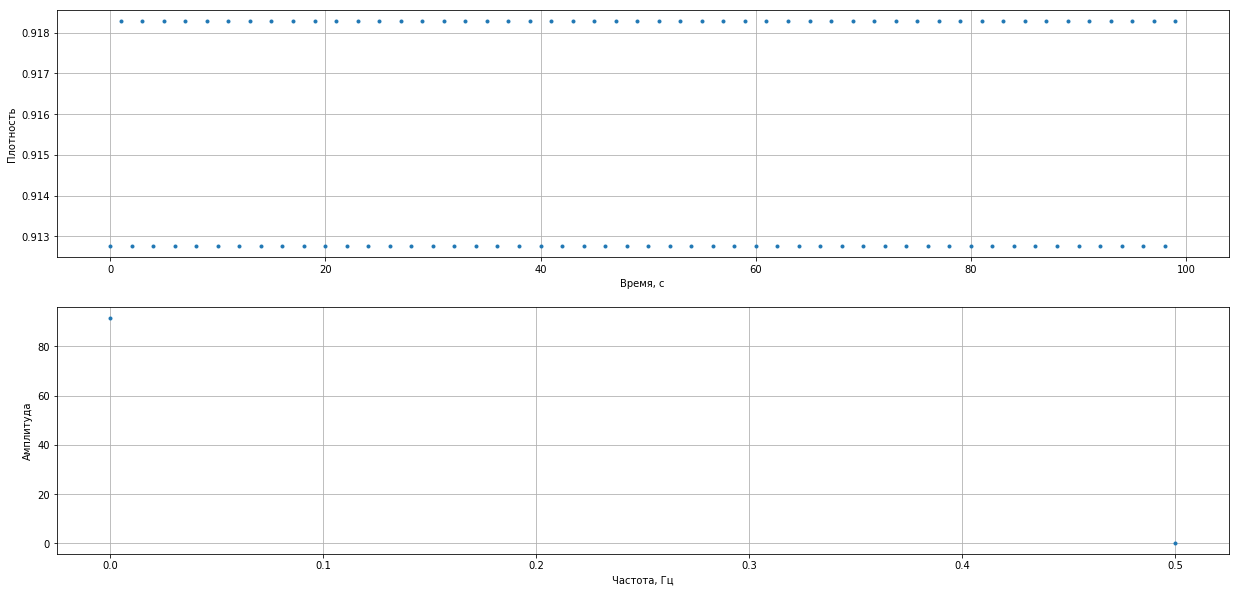

[91.55188246  0.27548209]
*************
seed=4


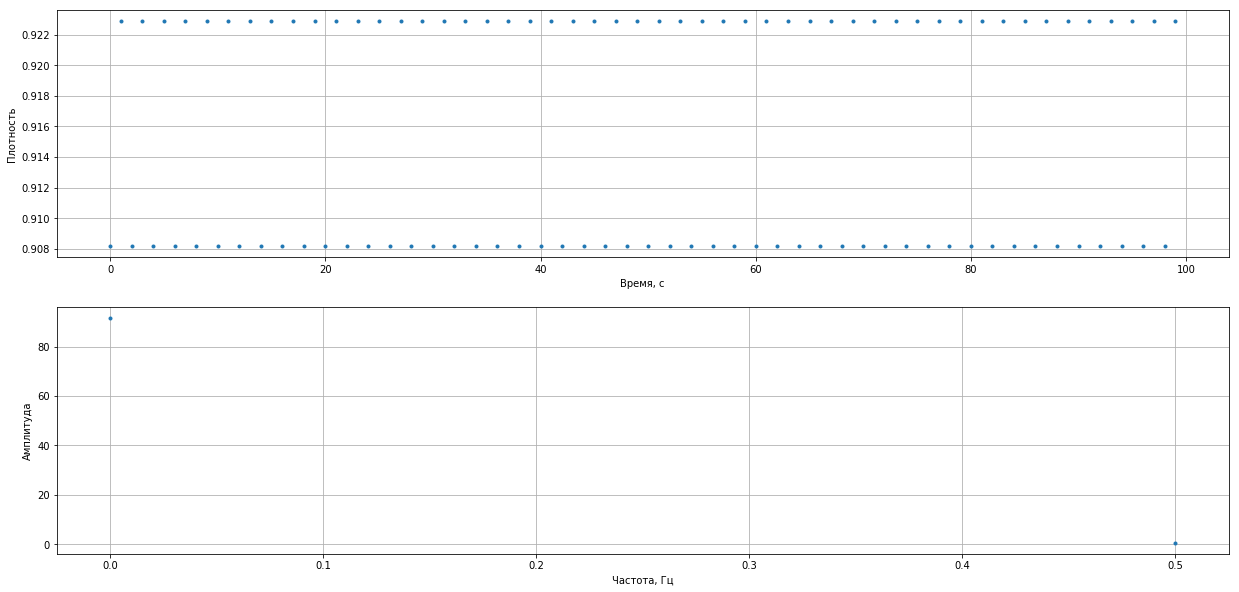

[91.55188246  0.73461892]
*************
seed=12


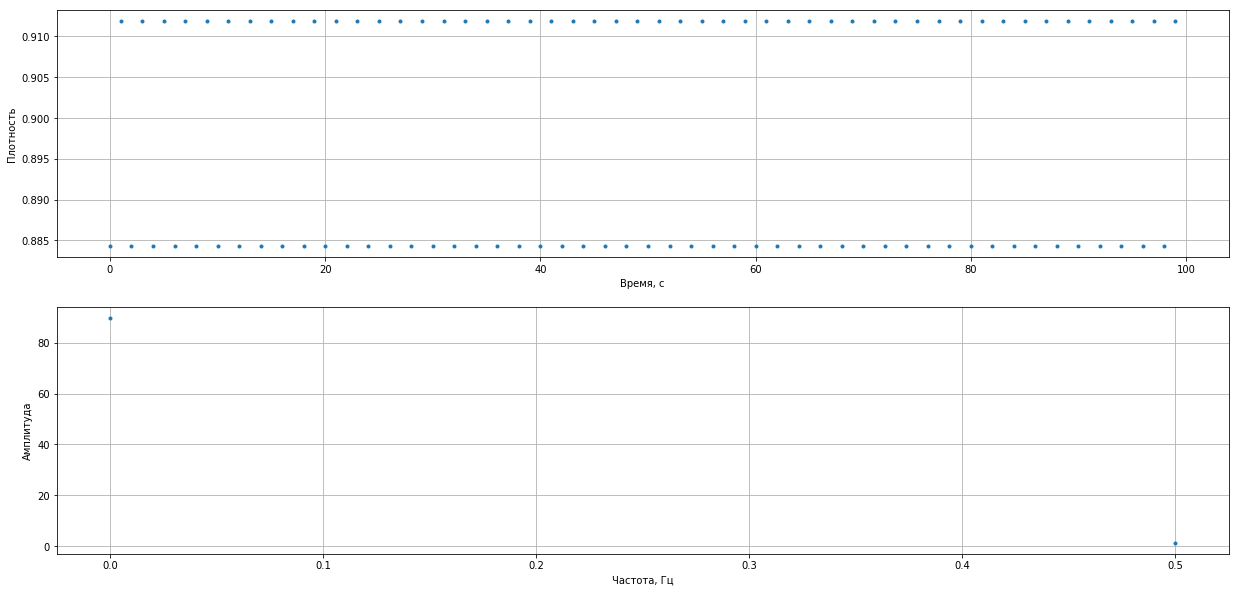

[89.80716253  1.37741047]


In [18]:
print('seed=1')
fourier(seed1[1])
print('*************')
print('seed=4')
fourier(seed4[1])
print('*************')
print('seed=12')
fourier(seed12[1])

### b=4/3

seed=1


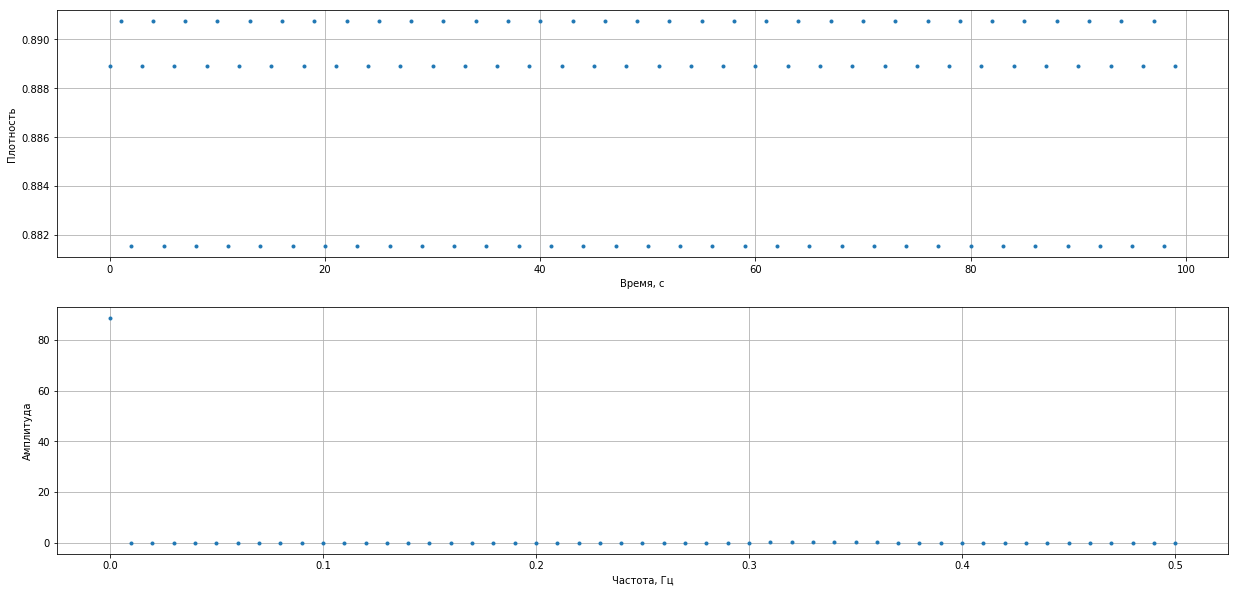

[8.87070707e+01 1.84057856e-03 1.85271183e-03 1.87306685e-03
 1.90184786e-03 1.93935083e-03 1.98597386e-03 2.04223139e-03
 2.10877279e-03 2.18640627e-03 2.27612951e-03 2.37916904e-03
 2.49703084e-03 2.63156625e-03 2.78505844e-03 2.96033744e-03
 3.16093518e-03 3.39129769e-03 3.65708073e-03 3.96556946e-03
 4.32628732e-03 4.75190179e-03 5.25961007e-03 5.87333021e-03
 6.62730153e-03 7.57227847e-03 8.78679332e-03 1.03990905e-02
 1.26337392e-02 1.59227889e-02 2.12170106e-02 3.10974770e-02
 5.58892729e-02 2.29822044e-01 1.18254441e-01 4.87307685e-02
 3.14122995e-02 2.35900050e-02 1.91630984e-02 1.63377167e-02
 1.43968030e-02 1.29979227e-02 1.19572242e-02 1.11675140e-02
 1.05624382e-02 1.00991148e-02 9.74902835e-03 9.49296837e-03
 9.31809569e-03 9.21620896e-03 9.18273646e-03]
*************
seed=4


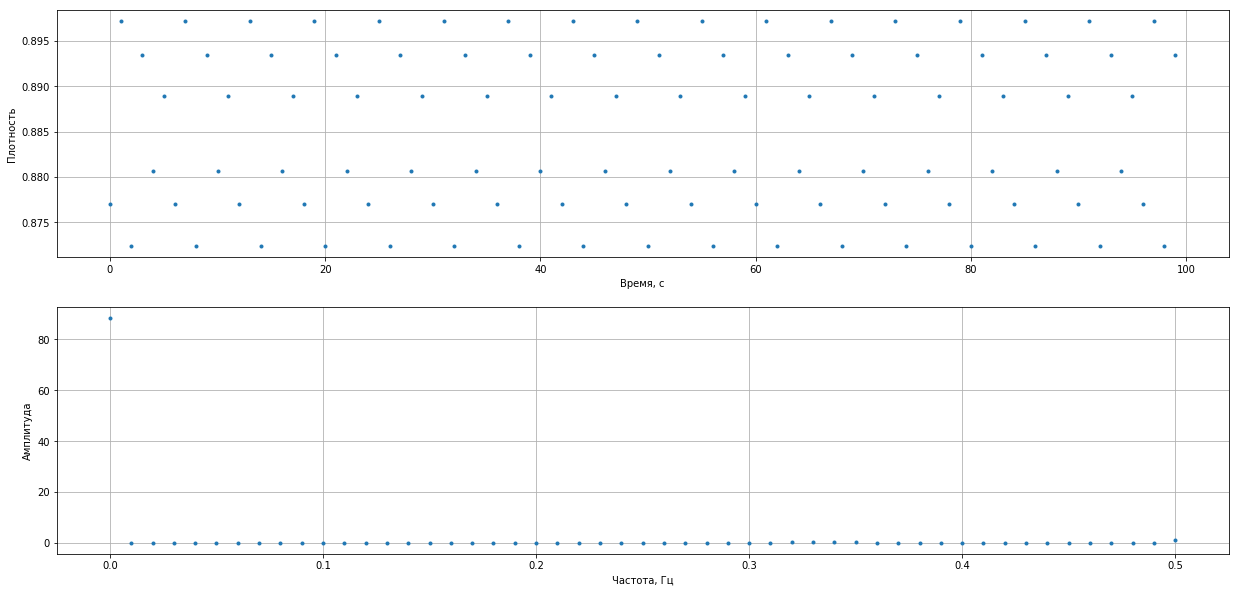

[8.84912764e+01 3.18360641e-04 3.52915560e-04 4.04872715e-04
 4.69653918e-04 5.44173948e-04 6.26723634e-04 7.16560089e-04
 8.13584436e-04 9.18147415e-04 1.03094768e-03 1.15298994e-03
 1.28558321e-03 1.43036969e-03 1.58938160e-03 1.76512861e-03
 1.96072330e-03 2.18005768e-03 2.42805246e-03 2.71101297e-03
 3.03714714e-03 3.41733673e-03 3.86631804e-03 4.40454903e-03
 5.06127766e-03 5.87982024e-03 6.92715945e-03 8.31263634e-03
 1.02276723e-02 1.30404929e-02 1.75613572e-02 2.59898126e-02
 4.71246024e-02 1.95351982e-01 1.01260838e-01 4.20086602e-02
 2.72446019e-02 2.05733691e-02 1.67960458e-02 1.43839411e-02
 1.27259858e-02 1.15303535e-02 1.06403590e-02 9.96464403e-03
 9.44665430e-03 9.04983872e-03 8.74989055e-03 8.53043350e-03
 8.38052215e-03 8.29316449e-03 8.34710744e-01]
*************
seed=12


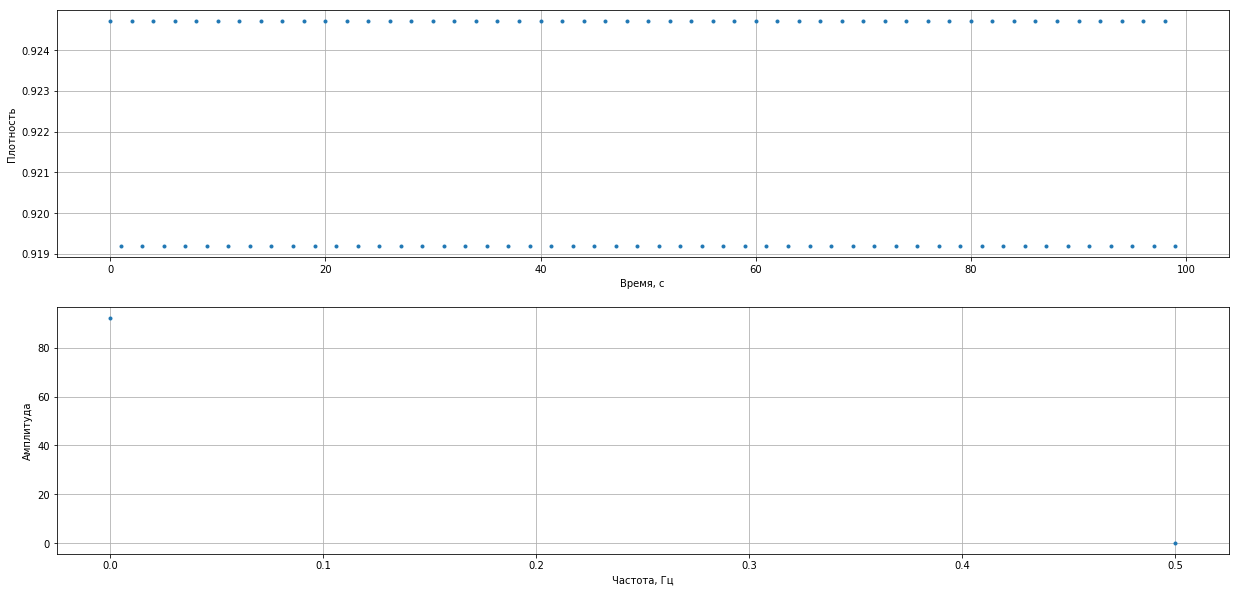

[92.19467401  0.27548209]


In [19]:
print('seed=1')
fourier(seed1[2])
print('*************')
print('seed=4')
fourier(seed4[2])
print('*************')
print('seed=12')
fourier(seed12[2])

### b=6/4

seed=1


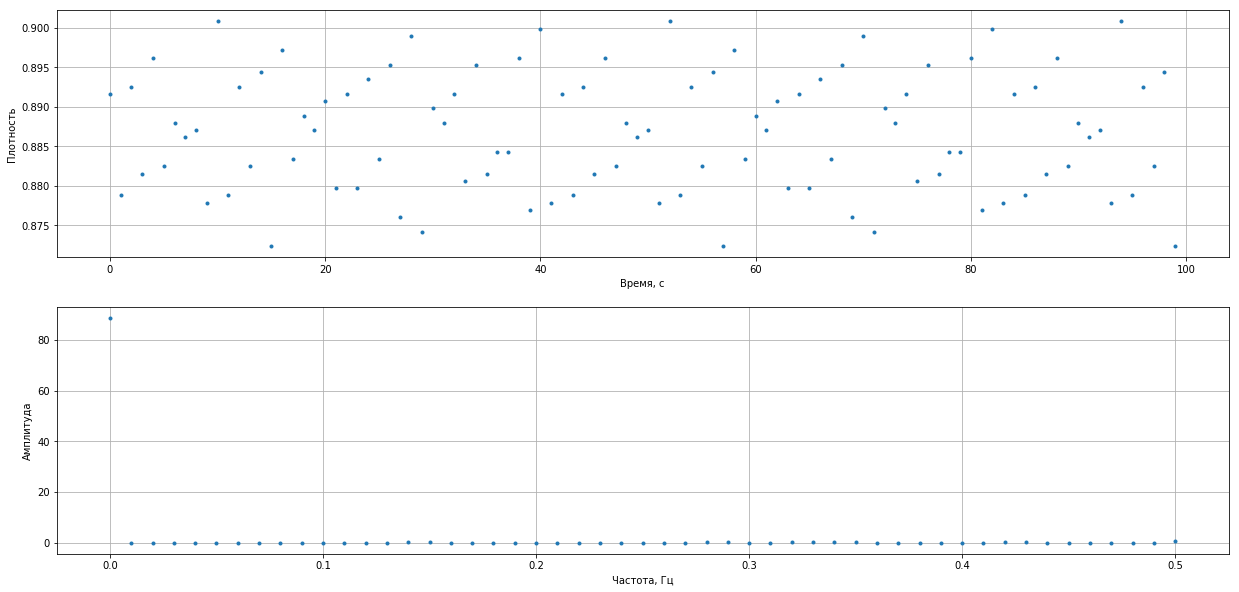

[8.86831956e+01 6.75396071e-03 6.81486317e-03 6.91999099e-03
 7.07536890e-03 7.29079827e-03 7.58176613e-03 7.97302681e-03
 8.50567828e-03 9.25232871e-03 1.03535424e-02 1.21208962e-02
 1.54107720e-02 2.37443016e-02 8.99956844e-02 2.92854891e-02
 1.14679593e-02 1.27485884e-02 3.21612790e-03 2.15888577e-03
 2.65228510e-03 3.50033846e-03 4.44733258e-03 5.52370134e-03
 6.85585044e-03 8.71150871e-03 1.17753952e-02 1.85521610e-02
 4.98955796e-02 7.11161935e-02 2.80016885e-02 2.77462802e-02
 4.31394784e-02 1.67548446e-01 8.42830593e-02 3.45631899e-02
 2.24886335e-02 1.73343019e-02 1.48056399e-02 1.37905607e-02
 1.41859905e-02 1.70348603e-02 2.94979071e-02 1.45372096e-01
 1.54426304e-02 7.29726685e-03 4.62239183e-03 3.42259499e-03
 2.82350836e-03 2.53519563e-03 6.29935721e-01]
*************
seed=4


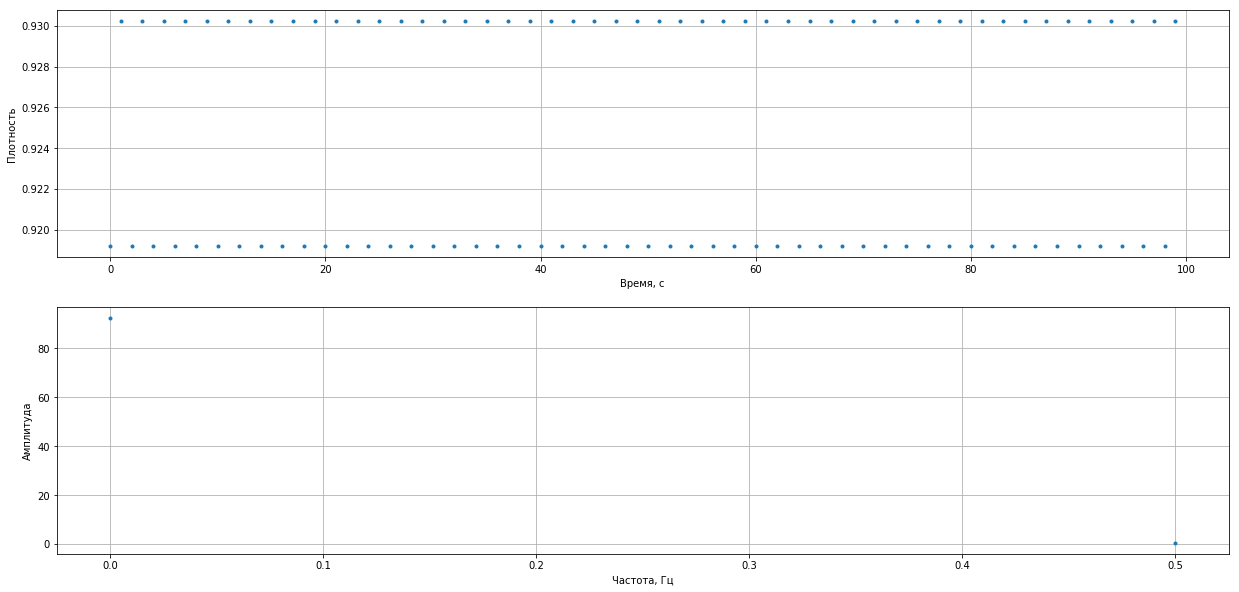

[92.47015611  0.55096419]
*************
seed=12


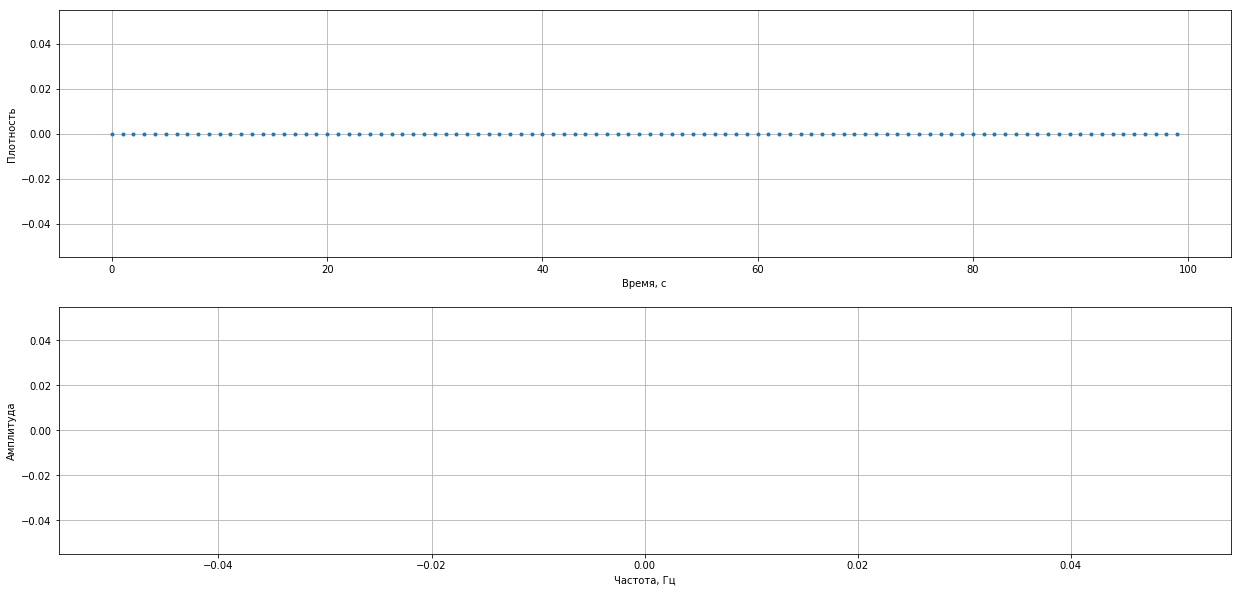

[]


In [20]:
print('seed=1')
fourier(seed1[3])
print('*************')
print('seed=4')
fourier(seed4[3])
print('*************')
print('seed=12')
fourier(seed12[3])

### b=5/3

seed=1


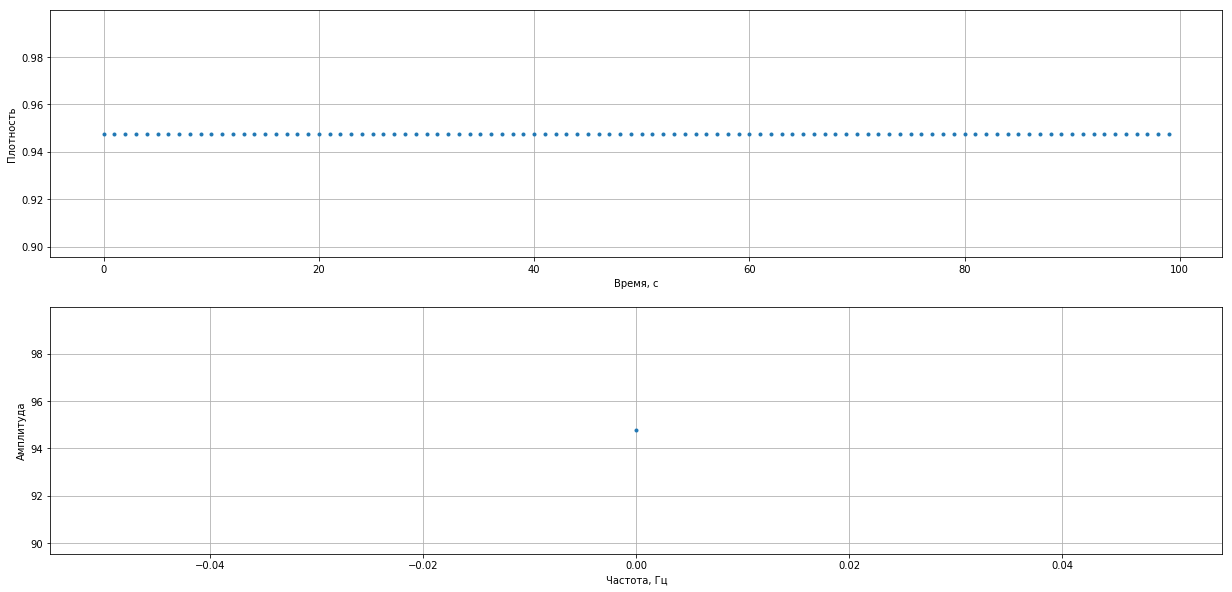

[94.76584022]
*************
seed=4


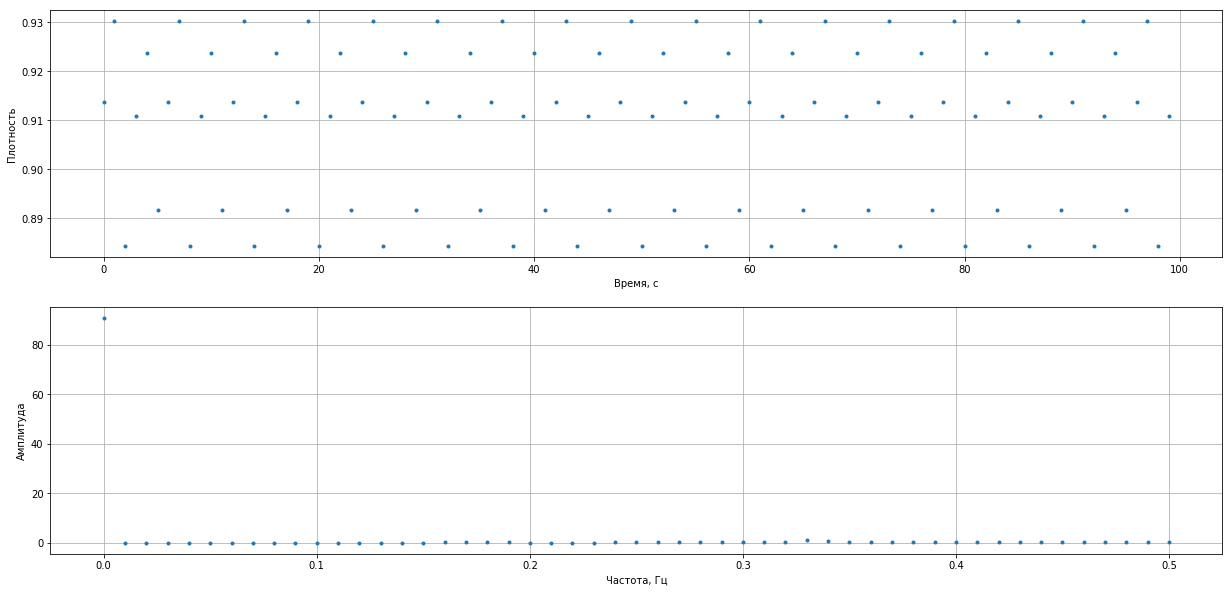

[9.09118457e+01 2.75787810e-03 2.76667584e-03 2.78007803e-03
 2.79614654e-03 2.81210065e-03 2.82435215e-03 2.82884824e-03
 2.82241311e-03 2.80716697e-03 2.80428969e-03 2.89451437e-03
 3.31721205e-03 4.62747776e-03 7.97797226e-03 1.68658921e-02
 5.57715986e-02 1.45395284e-01 4.66278317e-02 3.37261413e-02
 2.95873086e-02 2.83339229e-02 2.85559199e-02 2.98063239e-02
 3.19774118e-02 3.51472162e-02 3.95614880e-02 4.56959841e-02
 5.44330113e-02 6.75059029e-02 8.87580423e-02 1.28649966e-01
 2.29058503e-01 9.34483626e-01 4.77613282e-01 1.95690690e-01
 1.25526064e-01 9.38713284e-02 7.59800963e-02 6.45768016e-02
 5.67537263e-02 5.11226248e-02 4.69383940e-02 4.37667688e-02
 4.13390470e-02 3.94816519e-02 3.80792102e-02 3.70540274e-02
 3.63541963e-02 3.59465691e-02 2.19467401e-01]
*************
seed=12


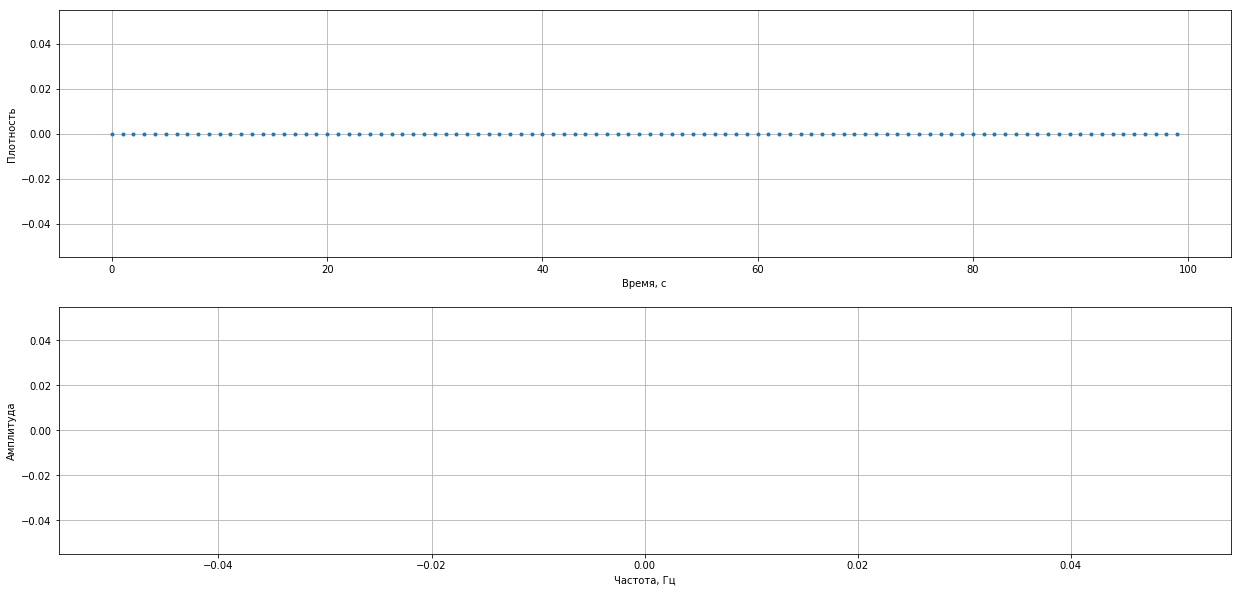

[]


In [21]:
print('seed=1')
fourier(seed1[4])
print('*************')
print('seed=4')
fourier(seed4[4])
print('*************')
print('seed=12')
fourier(seed12[4])

### b=7/4

seed=1


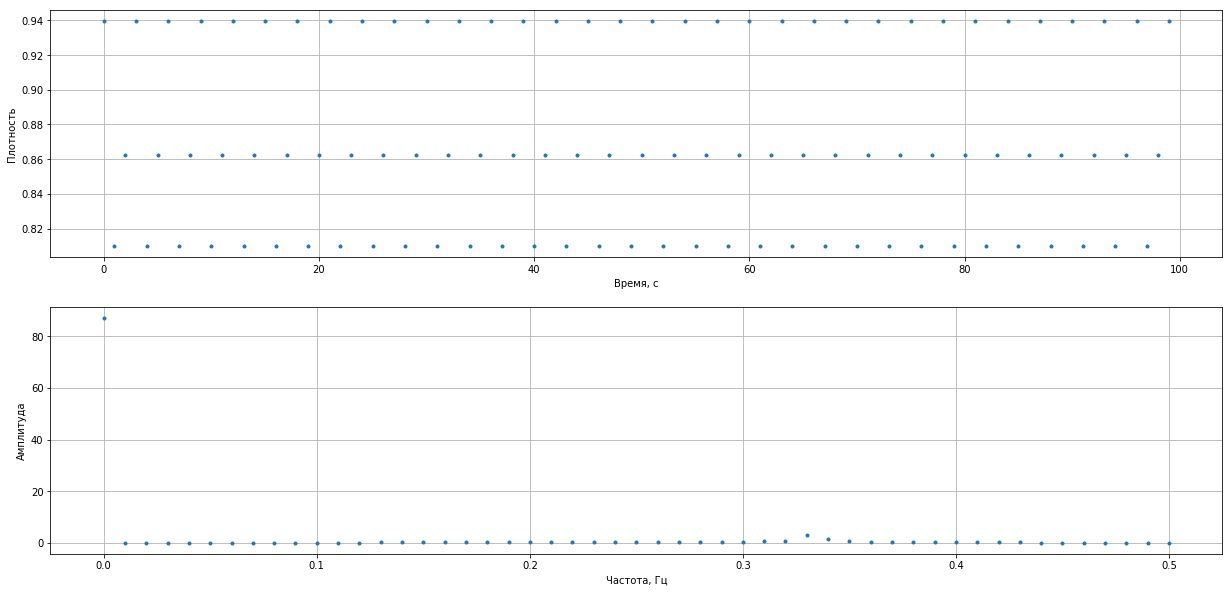

[8.71212121e+01 6.89293991e-02 6.91066373e-02 6.94040886e-02
 6.98248926e-02 7.03735654e-02 7.10561271e-02 7.18802775e-02
 7.28556300e-02 7.39940167e-02 7.53098855e-02 7.68208129e-02
 7.85481727e-02 8.05180095e-02 8.27621910e-02 8.53199453e-02
 8.82399360e-02 9.15831066e-02 9.54266426e-02 9.98695986e-02
 1.05041063e-01 1.11112302e-01 1.18315334e-01 1.26972306e-01
 1.37543752e-01 1.50711618e-01 1.67530232e-01 1.89720305e-01
 2.20293739e-01 2.65043582e-01 3.36716003e-01 4.69910345e-01
 8.03029823e-01 3.13534665e+00 1.52952033e+00 5.96648204e-01
 3.63507391e-01 2.57609343e-01 1.97179253e-01 1.58175991e-01
 1.30994857e-01 1.11055982e-01 9.59093525e-02 8.41376501e-02
 7.48770540e-02 6.75850037e-02 6.19178818e-02 5.76614178e-02
 5.46876043e-02 5.29256418e-02 5.23415978e-02]
*************
seed=4


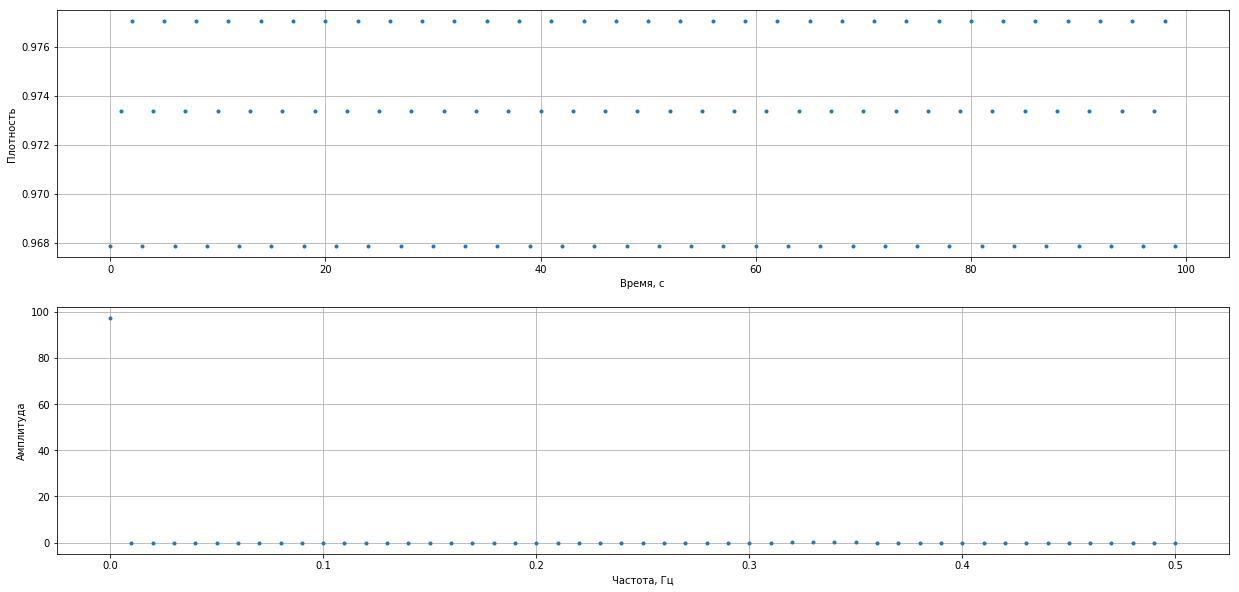

[9.72708907e+01 4.90164210e-03 4.91423345e-03 4.93536488e-03
 4.96525929e-03 5.00423729e-03 5.05272626e-03 5.11127284e-03
 5.18055948e-03 5.26142617e-03 5.35489851e-03 5.46222424e-03
 5.58492058e-03 5.72483626e-03 5.88423335e-03 6.06589625e-03
 6.27327906e-03 6.51070734e-03 6.78365933e-03 7.09916526e-03
 7.46638674e-03 7.89747847e-03 8.40890648e-03 9.02353248e-03
 9.77403861e-03 1.07088189e-02 1.19026920e-02 1.34777645e-02
 1.56477669e-02 1.88237833e-02 2.39102974e-02 3.33625144e-02
 5.70016543e-02 2.22505668e-01 1.08516586e-01 4.23182502e-02
 2.57733778e-02 1.82576665e-02 1.39682947e-02 1.11992743e-02
 9.26904089e-03 7.85260019e-03 6.77610147e-03 5.93898587e-03
 5.27998824e-03 4.76066371e-03 4.35671357e-03 4.05304755e-03
 3.84071789e-03 3.71483556e-03 3.67309458e-03]
*************
seed=12


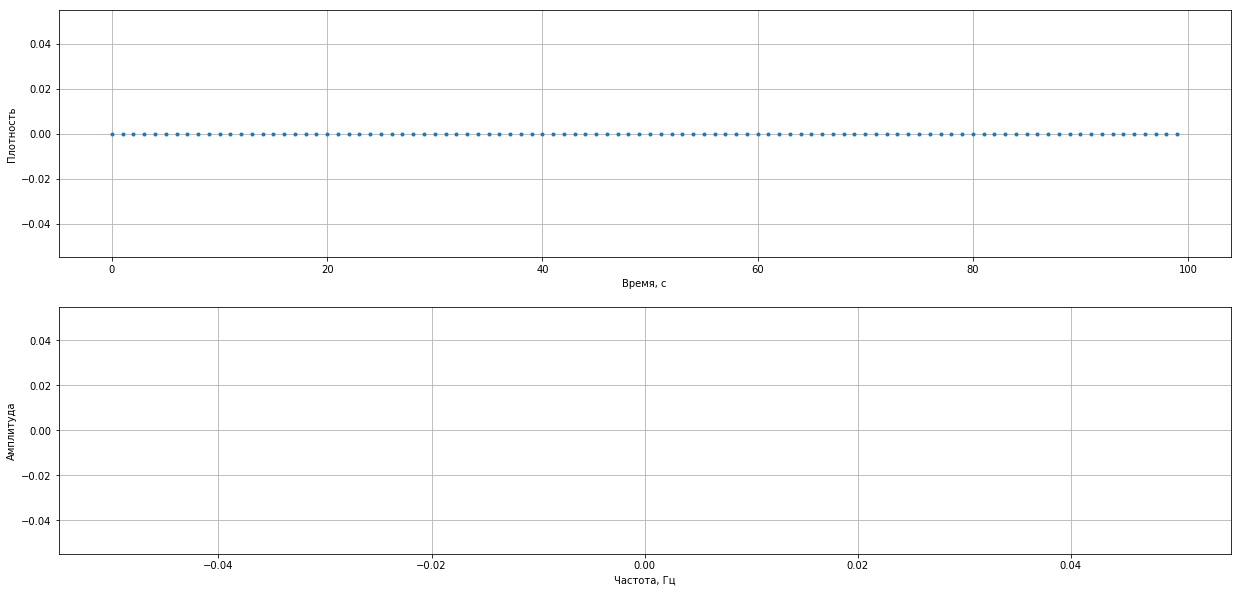

[]


In [22]:
print('seed=1')
fourier(seed1[5])
print('*************')
print('seed=4')
fourier(seed4[5])
print('*************')
print('seed=12')
fourier(seed12[5])

### b=2

seed=1


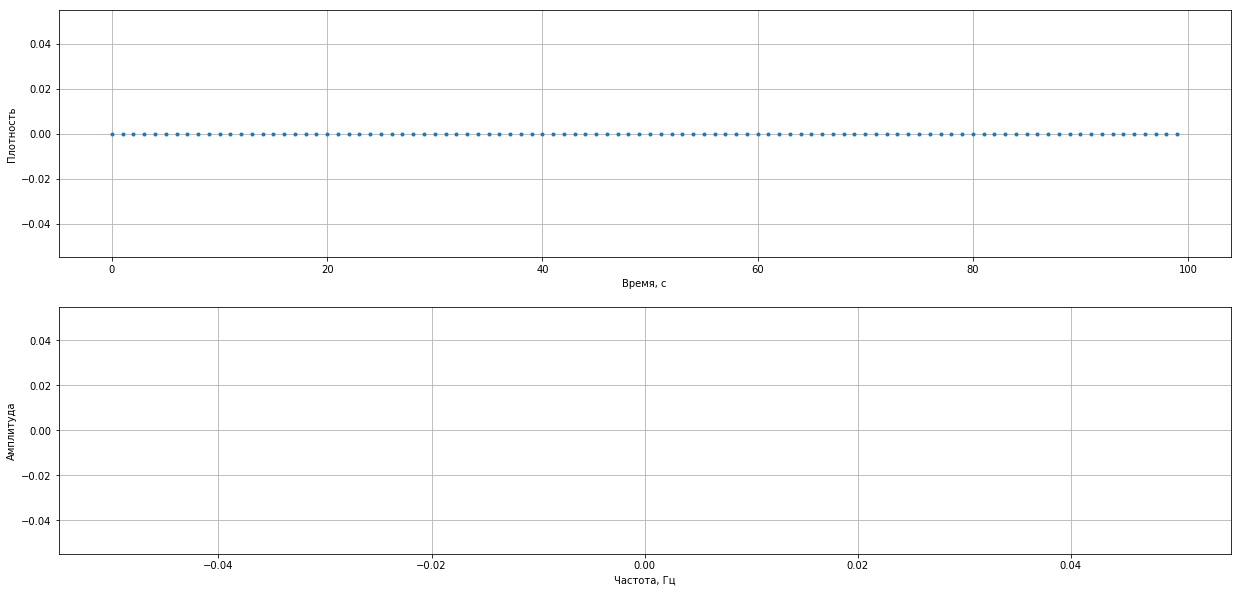

[]
*************
seed=4


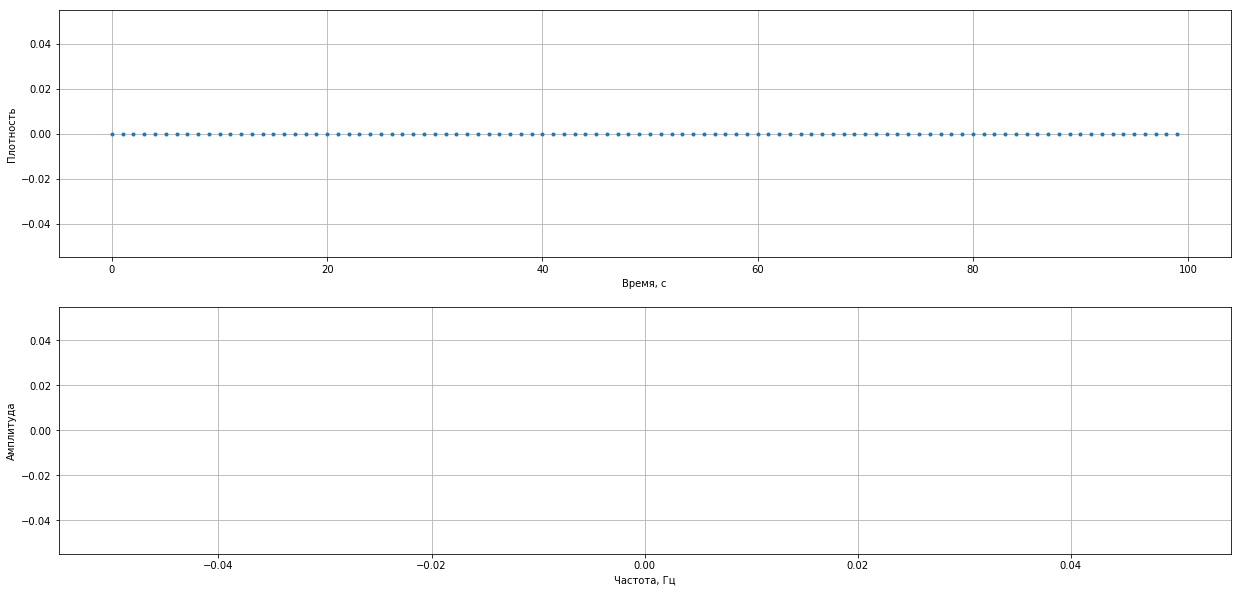

[]
*************
seed=12


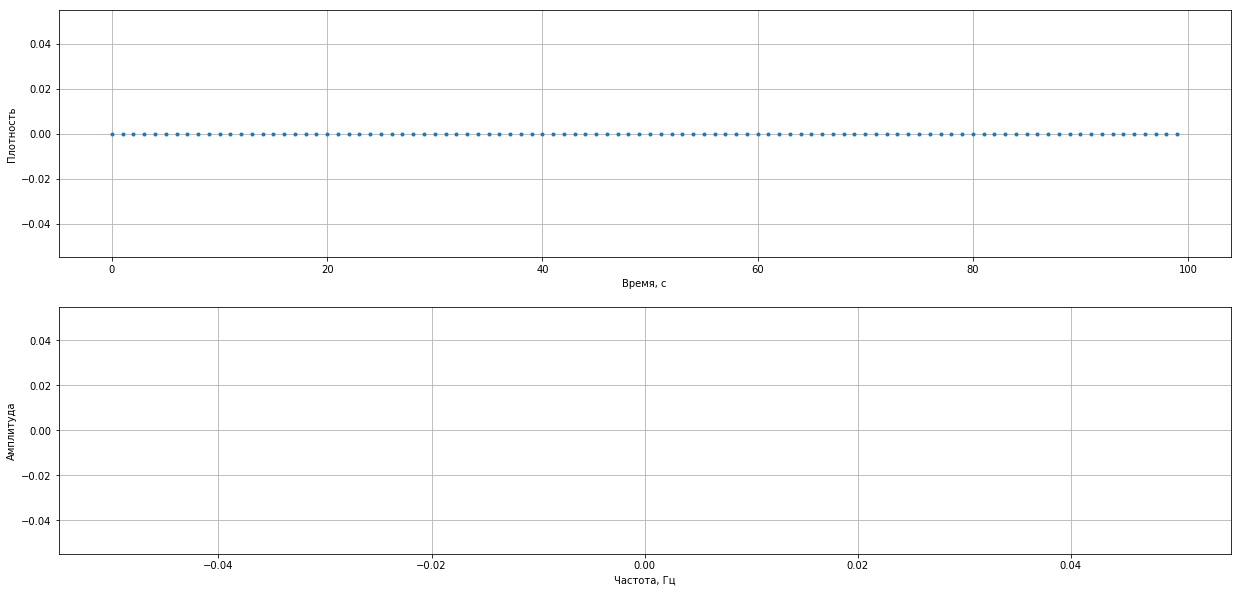

[]


In [23]:
print('seed=1')
fourier(seed1[6])
print('*************')
print('seed=4')
fourier(seed4[6])
print('*************')
print('seed=12')
fourier(seed12[6])

### b=7/3

seed=1


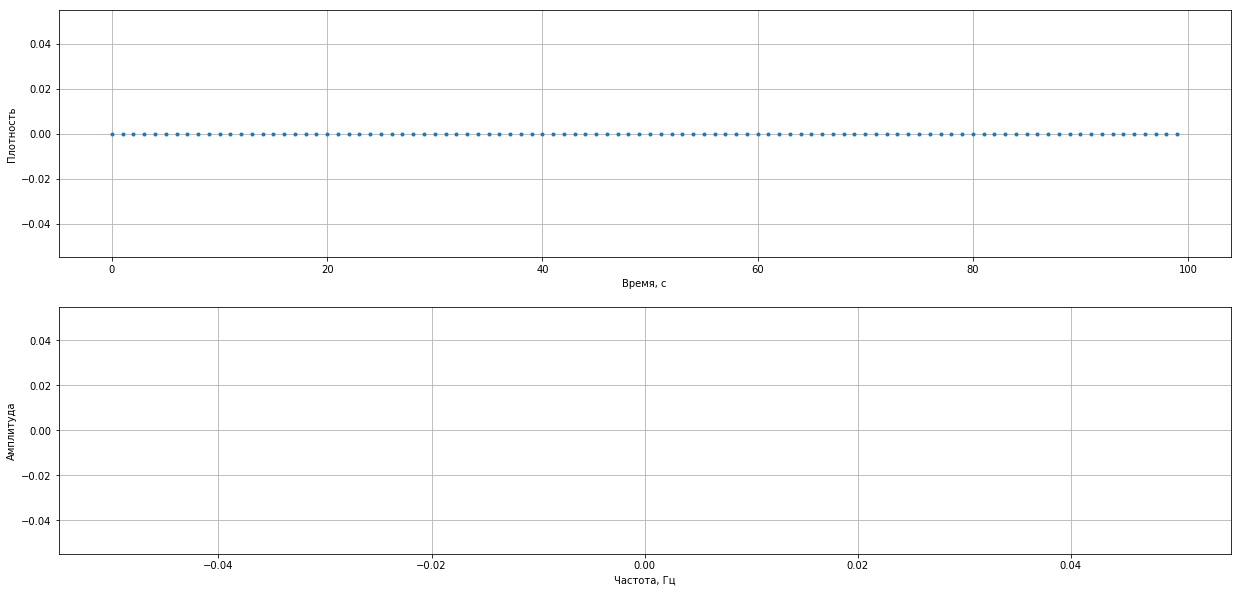

[]
*************
seed=4


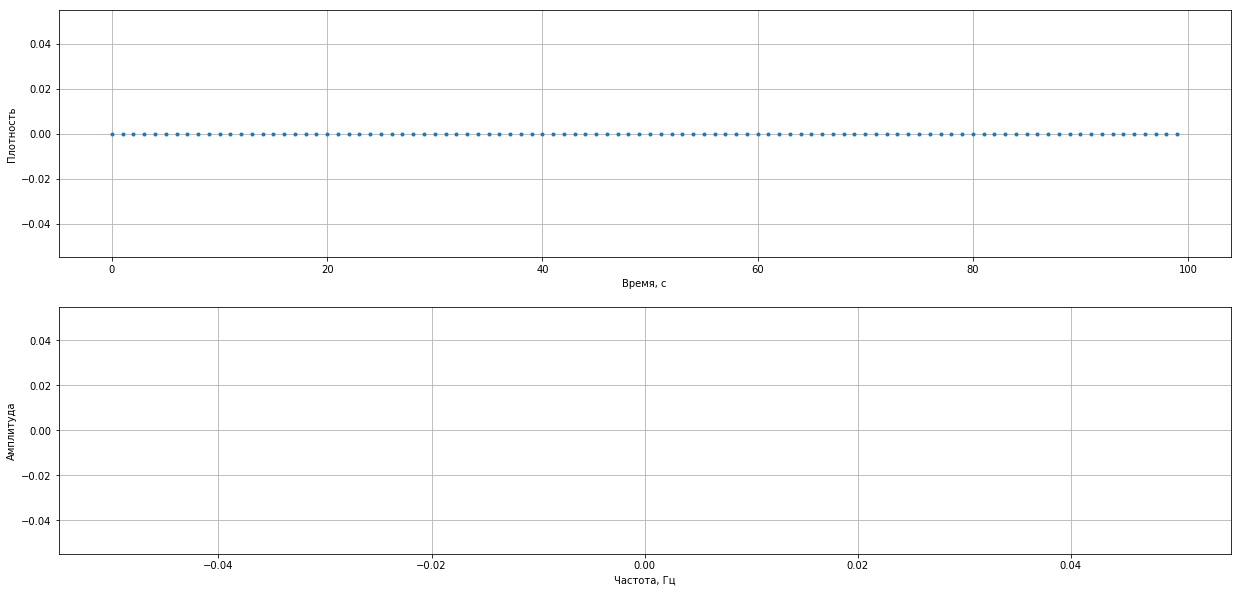

[]
*************
seed=12


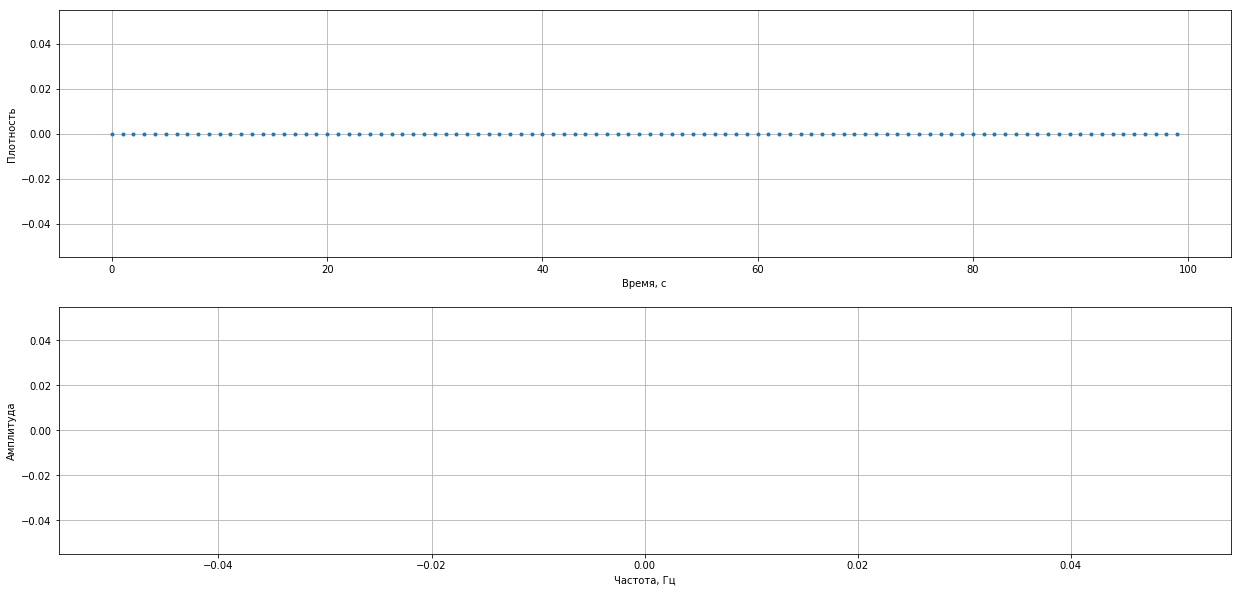

[]


In [24]:
print('seed=1')
fourier(seed1[7])
print('*************')
print('seed=4')
fourier(seed4[7])
print('*************')
print('seed=12')
fourier(seed12[7])

Вывод: для плотности при разных seed может быть разница как в значениях самой плотности, так и в количестве частот, полученных при анализе Фурье

## Разобраться с масштабами времен для режима (7/4, 2) на треугольной решетке: точно ли там уже достигнут steady state?

In [25]:
density1=c_density(size=33, percentage=70, burnin=5000)[5] #7/4
density2=c_density(size=33, percentage=70, burnin=5000)[6] #2

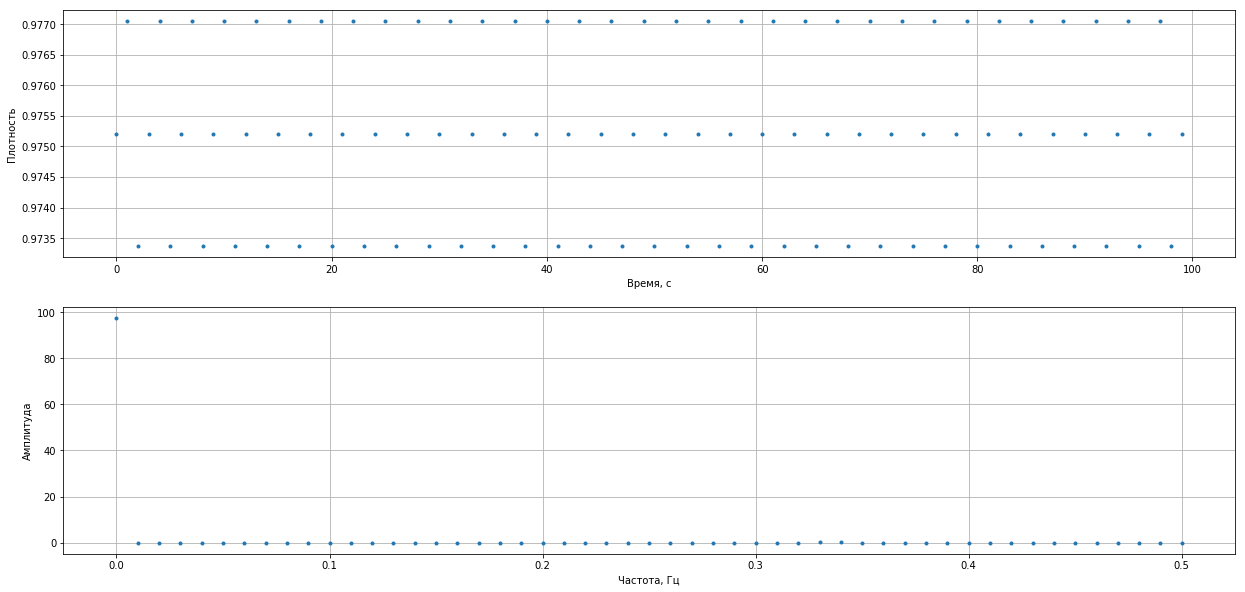

[9.75206612e+01 3.85088887e-05 7.72847814e-05 1.16599780e-04
 1.56736381e-04 1.97993179e-04 2.40691219e-04 2.85181281e-04
 3.31852446e-04 3.81142391e-04 4.33550005e-04 4.89651102e-04
 5.50118315e-04 6.15746625e-04 6.87486647e-04 7.66488625e-04
 8.54161535e-04 9.52253766e-04 1.06296529e-03 1.18910668e-03
 1.33432971e-03 1.50347001e-03 1.70307117e-03 1.94221329e-03
 2.23387404e-03 2.59727009e-03 3.06211420e-03 3.67690592e-03
 4.52654967e-03 5.77436790e-03 7.77973917e-03 1.15182365e-02
 2.08923924e-02 8.66362602e-02 4.49210894e-02 1.86406666e-02
 1.20921949e-02 9.13316827e-03 7.45769630e-03 6.38775392e-03
 5.65231136e-03 5.12193359e-03 4.72712518e-03 4.42736540e-03
 4.19757025e-03 4.02152786e-03 3.88845720e-03 3.79109468e-03
 3.72458551e-03 3.68582841e-03 3.67309458e-03]


In [26]:
fourier(density1)

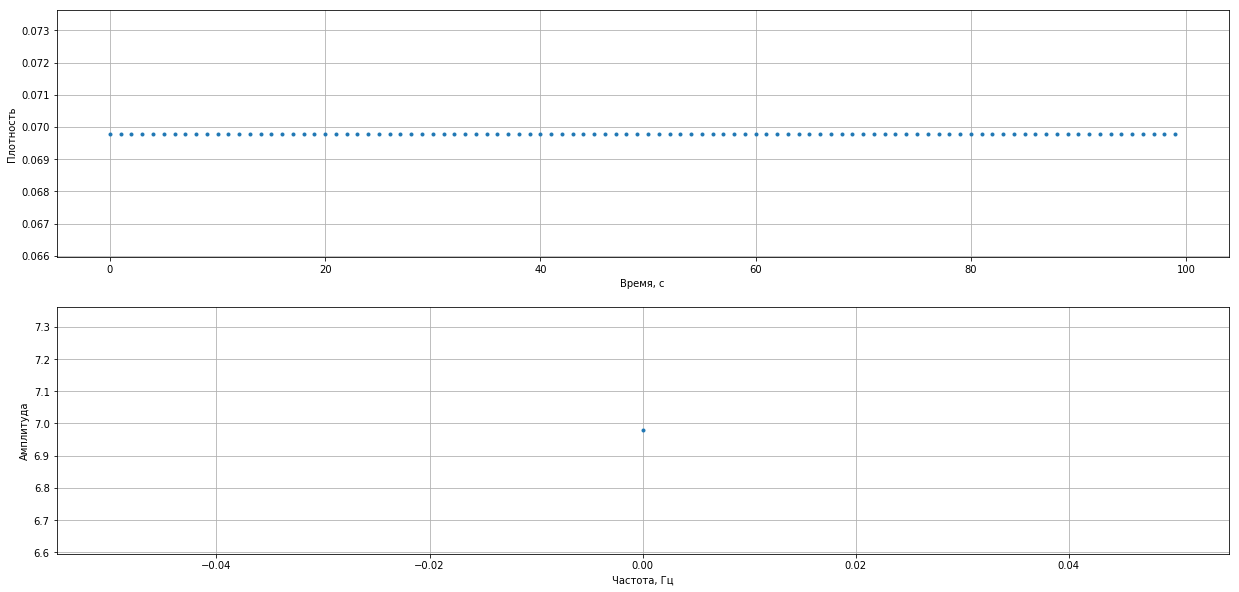

[6.97887971]


In [27]:
fourier(density2)

density state достигается во втором случае

посмотрим, на каком именно шаге

In [28]:
alldensity2=c_density(size=33, percentage=70, burnin=0, evol=100)[6] #2

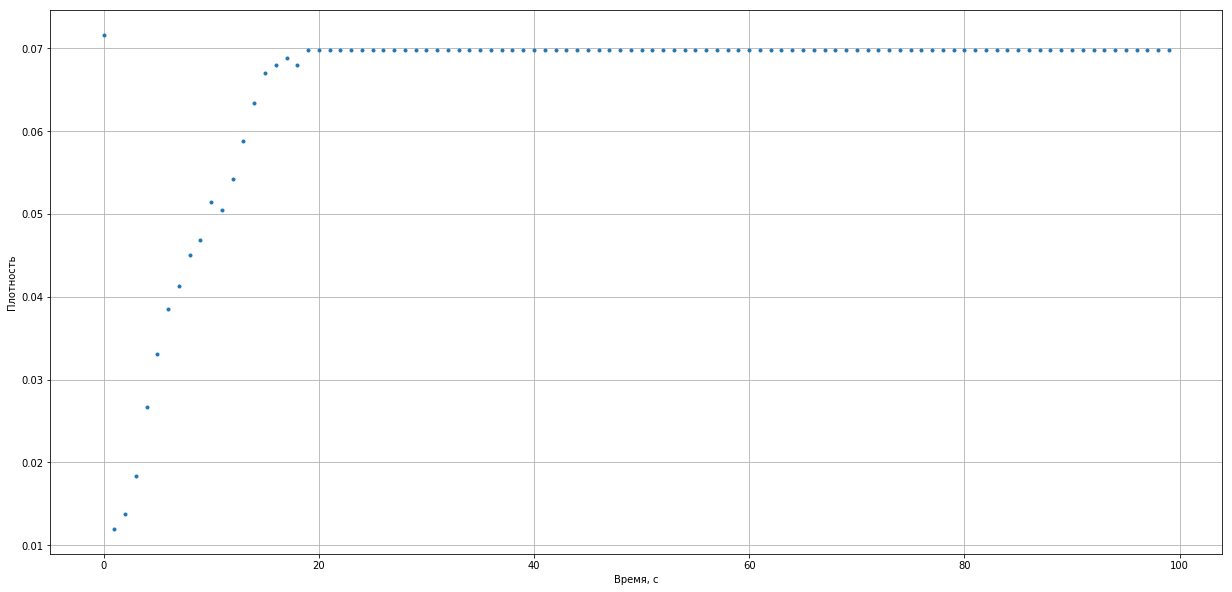

In [29]:
fig, ax = plt.subplots(figsize=(21,10))
    
ax.plot(alldensity2, '.')
ax.set_xlabel('Время, c')
ax.set_ylabel('Плотность')
ax.grid(True)